# LMT analysis script for Amy and Lucas' data; Day: Standard

@author: Amy Hassett (ft. Fabrice/ Elodie's code)

The purpose of this notebook is to act as the pipeline document for analysis of the LMT data, including any manipulations that must be performed before extracting the final data from the .sql database


**Steps:**
1. Set up the environment > import things into the code that will be used later
2. Set genotype/ group identity > change the genotype or group identity of the animals (can also be done directly in the SQL file)
3. Check experiment reliability
4. Rebuild all events > Rebuild the database to include all the events that the LMT can compute. (i.e. the ones that are not computed in real-time; Note: this includes "CorrectDetectionIdentity").
5. Check experiment reliability (post fixing up)
6. Show sensor data (shows the data recorded by the arduino, located outside of the LMT enclosure, but inside the behavioural box)
7. Compute bad orientation estimation > This is a piece of code written by Fabrice, but it has not yet been full explored. We compute it just to have it.

## Step 1: Performs the imports:

**Note that the window that pops up to get the sql file may be hidden by other windows.**

In [1]:
'''
Created on 15 fev. 2019

@author: Fab
'''
%matplotlib inline

import sys
sys.path.insert(1, "/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT")


import pandas as pd
import numpy as np

import sqlite3
from lmtanalysis.FileUtil import getFilesToProcess

from lmtanalysis.Animal import AnimalPool
from lmtanalysis.Measure import *
from lmtanalysis.Event import EventTimeLine, plotMultipleTimeLine

from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
import colorsys
from collections import Counter
import seaborn as sns

from tkinter.filedialog import askopenfilename
from lmtanalysis.Util import getMinTMaxTAndFileNameInput
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
from lmtanalysis.FileUtil import getFilesToProcess


### Step 1b: Load in the files of choice

**Note that the window that pops up to get the sql file may be hidden by other windows**

**Be mindfull for the fact that the SQLite should match the experiment type of the notebook (look at the title)**

In [3]:
#ask the user for database to process
print( "Select file name in window")
files = getFilesToProcess()

Select file name in window
Folder:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s
Fetching files...
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite found.


# Step 2: Set Genotype
This code lets you set the genotype of each animal in your database.

**Note that the text box will appear in the white area underneath this code!**

In [4]:
for file in files:
    
    print("---------------")
    print("Current file: " , file )
    
    connection = sqlite3.connect( file )
    
    pool = AnimalPool( )
    pool.loadAnimals( connection )
    
    for animal in pool.getAnimalList():
        print( "****")
        
        genotype = input( "Type new GENOTYPE!! for RFID "+ str(animal.RFID)+ " Current GENOTYPE: " + str(animal.genotype) + " ([Enter] to keep existing one):")
        genotype = genotype.strip()
        if len(genotype) > 0:
            print("setting ", genotype , " to " , animal.RFID )
            animal.setGenotype( genotype )
        else:
            print( "keeping genotype", animal.genotype )
        
        name = input( "Type new NAME!! for RFID "+ str(animal.RFID)+ " Current NAME: " + str(animal.name) + " ([Enter] to keep existing one):")
        name = name.strip()
        if len(name) > 0:
            print("setting ", name , " to " , animal.RFID )
            animal.setAnimalName( name )
        else:
            print( "keeping name", animal.name 
                 )
        
    print("Genotype and Name saved in database.")

    



---------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:03123-01 RFID:000005416968 Genotype:Filler Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:03123-02 RFID:000005416963 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
****
Type new GENOTYPE!! for RFID 000005416968 Current GENOTYPE: Filler ([Enter] to keep existing one):
keeping genotype Filler
Type new NAME!! for RFID 000005416968 Current NAME: 03123-01 ([Enter] to keep existing one):
keeping name 03123-01
****
Type new GENOTYPE!! for RFID 000005416963 Current GENOTYPE: L7-TSC1 Het+ ([Enter] to keep existing one):
keeping genotyp

Type new NAME!! for RFID 000005416928 Current NAME: 01927-04 ([Enter] to keep existing one):
keeping name 01927-04
****
Type new GENOTYPE!! for RFID 000005417035 Current GENOTYPE: L7-Tsc1 Wt ([Enter] to keep existing one):
keeping genotype L7-Tsc1 Wt
Type new NAME!! for RFID 000005417035 Current NAME: 02063-05 ([Enter] to keep existing one):
keeping name 02063-05
Genotype and Name saved in database.
---------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-01 RFID:000005416780 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02436 RFID:000005417240 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02436 RFID:000005417256 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:N





















# Step 3: Check experiment reliability (before processing)
this code gives feedback on how well the experiment does and saves the results as a txt file. In particular it describes how much of the detection was correctly detected

This code is repeated 5x below so that we can get the following data:
1. Missed detections (all of experiment)
2. Missed detections (hr1) 
3. Missed detections (hr2)
4. Missed detections (hr3)
5. Missed detections (hr1 + hr2; combined)

**Note: when naming the TXT file, ensure that it includes "_preprocessing" in the title**


In [17]:
##OPTIONAL
##change files to analyze if neccesary, reccomended to do entire folders to save space
files = getFilesToProcess()

Folder:  /mnt/Data1/Arun/LMT/LMT_data/Not processed/std1
Fetching files...
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/10659-3-5-9_12-04-2021_LMT_Std1/10659-3-5-9_12-04-2021_LMT_Std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/18802-2-3-5_11-01-2021_LMT_Std1/18802-2-3-5_11-01-2021_LMT_Std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/12410-1-6-7_04-7-2022_LMT_Std1/12410-1-6-7_04-7-2022_LMT_Std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/13134-01-03-08_LMT_25-07-2022_Std1/13134-01-03-08_LMT_25-07-2022_Std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/12387-3-7-10_01-08-2022_std1/12387-3-7-10_01-08-2022_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/12417-1-5-7_20-6-2022_LMT_Std1/12417-1-5-7_20-6-2022_LMT_Std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/01127-4-5-6_16-1-2023_std1/01127-4-5-6_16-1-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not processed/std1/10659-7-8

In [5]:
def reliabilitycheck(Files,text_file,startFrame=None,endFrame=None):
    for file in files:
        ## Txt file of entire experiment
        print( file )
        connection = sqlite3.connect( file )
        c = connection.cursor()
        text_file.write( file )
        text_file.write("\n")
        
        ##########################################################################
        '''Compute total recording duration'''
        print ("##############################################################")
        query = "SELECT MIN(TIMESTAMP) FROM FRAME";
        c.execute( query )
        rows = c.fetchall()
        for row in rows:
            realStartTime = datetime.datetime.fromtimestamp(row[0]/1000)
            realStartInSeconds = row[0]/1000
        
        #return realStartTime
        print( "Time of experiment start: {}".format(realStartTime) )
        text_file.write ( "Time of experiment start: {}\n".format(realStartTime) )
        
        query = "SELECT MAX(TIMESTAMP) FROM FRAME";
        c.execute( query )
        rows = c.fetchall()
        for row in rows:
            realEndTime = datetime.datetime.fromtimestamp(row[0]/1000)
            realEndInSeconds = row[0]/1000
        
        #return realEndTime
        print( "Time of experiment end: {}".format(realEndTime) )
        text_file.write( "Time of experiment end: {}\n".format(realEndTime) )
        #Total duration of experiment based on timestamp
        realDurationInSeconds = realEndInSeconds - realStartInSeconds + 1
        print( "Real duration of experiment: {} s ({} frames)".format( realDurationInSeconds, realDurationInSeconds*30 ) )
        text_file.write( "Real duration of experiment: {} s ({} frames)\n".format( realDurationInSeconds, realDurationInSeconds*30 ) )
        
        ##########################################################################
        '''Compute the total number of frames recorded'''
        #nbFramesRecorded = getNumberOfFrames(file)
        print ("##############################################################")
        query = "SELECT * FROM FRAME";
        c.execute( query )
        framesRecorded = c.fetchall()
        nbFramesRecorded = len(framesRecorded)
        print ( "Number of frames recorded:  {} frames ({} seconds or {} minutes or {} hours or {} days)".format(nbFramesRecorded, nbFramesRecorded/oneSecond, nbFramesRecorded/oneMinute, nbFramesRecorded/oneHour, nbFramesRecorded/oneDay))
        text_file.write( "Number of frames recorded:  {} frames ({} seconds or {} minutes or {} hours or {} days)\n".format(nbFramesRecorded, nbFramesRecorded/oneSecond, nbFramesRecorded/oneMinute, nbFramesRecorded/oneHour, nbFramesRecorded/oneDay) )
        
        query = "SELECT MIN(FRAMENUMBER) FROM FRAME";
        c.execute( query )
        minFrames = c.fetchall()
        if startFrame ==None:
            for minFrame in minFrames:
                startFrame = minFrame[0]
        
        query = "SELECT MAX(FRAMENUMBER) FROM FRAME";
        c.execute( query )
        maxFrames = c.fetchall()
        if endFrame==None:
            for maxFrame in maxFrames:
                endFrame = maxFrame[0]  
        
        durationExp = endFrame - startFrame +1
        print ("Experiment duration based on frames: {} frames".format(durationExp) ) 
        
        nbOmittedFrames = realDurationInSeconds*oneSecond - nbFramesRecorded
        print ( "Number of frames omitted: {} ({} % of the total experiment duration)".format (nbOmittedFrames, 100*nbOmittedFrames/(realDurationInSeconds*oneSecond)) )
        text_file.write( "Number of frames omitted: {} ({} % of the total experiment duration)\n".format (nbOmittedFrames, 100*nbOmittedFrames/(realDurationInSeconds*oneSecond)) )
        text_file.write("\n")
        
        print ("##############################################################")
        ##########################################################################
        '''Number of animals detected and rate of detection'''
        pool = AnimalPool( )
        pool.loadAnimals( connection )
        pool.loadDetection( start = startFrame, end = endFrame, lightLoad=True)
        print ("##############################################################")
        
        for animal in pool.animalDictionary.keys():
            
            nbOfDetections = pool.animalDictionary[animal].getNumberOfDetection(tmin = startFrame, tmax = endFrame)

            missedDetection = 1-nbOfDetections/nbFramesRecorded
            
            print ( "Animal {}: {} missed detections over {} frames recorded ({} %)".format( pool.animalDictionary[animal].RFID, nbFramesRecorded-nbOfDetections, nbFramesRecorded, missedDetection*100 ) )
            text_file.write( "Animal {}: {} missed detections over {} frames recorded ({} %)\n".format( pool.animalDictionary[animal].RFID, nbFramesRecorded-nbOfDetections, nbFramesRecorded, missedDetection*100 ) )
            '''Note: The score can be low, if the animals are often huddled in the nest and not identified individually.'''
        
        ##########################################################################
        '''Number of RFID match'''
        print ("##############################################################")
        
        for animal in pool.animalDictionary.keys():
            rfidMatchTimeLine = EventTimeLine( connection, "RFID MATCH", idA = animal )
            rfidMismatchTimeLine = EventTimeLine( connection, "RFID MISMATCH", idA = animal )
            nbOfRfidMatch = rfidMatchTimeLine.getNumberOfEvent(minFrame=216000, maxFrame=endFrame)
            nbOfRfidMismatch = rfidMismatchTimeLine.getNumberOfEvent(minFrame=216000, maxFrame=endFrame)
            print( "Number of RFID match for animal {}: {} (rate: {} events/min)".format( pool.animalDictionary[animal].RFID, nbOfRfidMatch, nbOfRfidMatch/(durationExp*30*60) ) )
            print( "Number of RFID mismatch for animal {}: {} (rate: {} events/min)".format( pool.animalDictionary[animal].RFID, nbOfRfidMismatch, nbOfRfidMismatch/(durationExp*30*60) ) )
            text_file.write( "Number of RFID match for animal {}: {} (rate: {} events/min)\n".format( pool.animalDictionary[animal].RFID, nbOfRfidMatch, nbOfRfidMatch/(durationExp*30*60) ) )
            text_file.write( "Number of RFID mismatch for animal {}: {} (rate: {} events/min)\n".format( pool.animalDictionary[animal].RFID, nbOfRfidMismatch, nbOfRfidMismatch/(durationExp*30*60) ) )
            
        print ("##############################################################")
        ##########################################################################
        '''Check events'''
        text_file.write( "\n" )
        text_file.write("Total number of each event type:\n")
        for event in behaviouralEvents:
            eventTimeLine = EventTimeLine( connection, event )
            nbOfEvents = eventTimeLine.getNumberOfEvent(minFrame=None, maxFrame=None)
            text_file.write("{}:\t {}\n".format(event, nbOfEvents))
        
        text_file.write( "\n" )    
        text_file.write( "##############################################################\n" )
        ##########################################################################
    text_file.write( "\n" )
    
    text_file.close()
    
    print("job done")

In [5]:
## Reliability checks



import sqlite3
import math
import time
import datetime
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
import os
from tkinter.filedialog import askopenfilename
from lmtanalysis.Util import getMinTMaxTAndFileNameInput, getFileNameInput,\
    getNumberOfFrames
from lmtanalysis.FileUtil import getFilesToProcess
startFramelist=[None]
endFramelist=[None]
#startFramelist=[None,None,108000,2160000,None]
#endFramelist=[None,108000,2160000,None,2160000]
labels=["all","H1","H2","H3","H12"]
if __name__ == '__main__':
    '''This script allows to have an overview of the quality of the tracking for the whole experiment.'''
    
    behaviouralEvents = ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact", "Side by side Contact, opposite way", "Social approach", "Social escape", "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated", "Train2", "Group2", "Group3", "Group 3 break", "Group 3 make", "Group4", "Group 4 break", "Group 4 make", "Huddling", "Move isolated", "Move in contact", "Nest3", "Nest4", "Rearing", "Rear isolated", "Rear in contact", "Stop isolated", "WallJump"]

    for i in range(len(startFramelist)):
        message="checking reliability before processing of time "+labels[i]+"\nReccomended to end the name with _preprocessing_reliability_"+labels[i]
        print(message)
        text_file = getFileNameInput()
        reliabilitycheck(files,text_file)


checking reliability before processing of time all
Reccomended to end the name with _preprocessing_reliability_all
File name : newL7_preprocessing_reliability_all
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite
##############################################################
Time of experiment start: 2023-07-03 11:29:04.569000
Time of experiment end: 2023-07-03 14:48:32.663000
Real duration of experiment: 11969.09400010109 s (359072.8200030327 frames)
##############################################################
Number of frames recorded:  359029 frames (11967.633333333333 seconds or 199.46055555555554 minutes or 3.3243425925925925 hours or 0.13851427469135802 days)
Experiment duration based on frames: 359029 frames
Number of frames omitted: 43.820003032684326 (0.012203653574312372 % of the total experiment duration)
##############################################################
Loading animals.
Fields available in lmtanalysi

Time of experiment end: 2023-06-12 12:55:21.939000
Real duration of experiment: 11398.506999969482 s (341955.2099990845 frames)
##############################################################
Number of frames recorded:  341895 frames (11396.5 seconds or 189.94166666666666 minutes or 3.1656944444444446 hours or 0.13190393518518517 days)
Experiment duration based on frames: 359029 frames
Number of frames omitted: 60.209999084472656 (0.017607568863955564 % of the total experiment duration)
##############################################################
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-02 RFID:000005416936 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02541-03 RFID:000005416897 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:No

Number of frames recorded:  352641 frames (11754.7 seconds or 195.91166666666666 minutes or 3.2651944444444445 hours or 0.13604976851851852 days)
Experiment duration based on frames: 359029 frames
Number of frames omitted: 234.39000034332275 (0.06642288099011232 % of the total experiment duration)
##############################################################
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:02063-04 RFID:000005417090 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:01927-04 RFID:000005416928 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:02063-05 RFID:000005417035 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02063-04 RFID:000005417090 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y FROM

Number of frames recorded:  324145 frames (10804.833333333334 seconds or 180.08055555555555 minutes or 3.0013425925925925 hours or 0.1250559413580247 days)
Experiment duration based on frames: 359029 frames
Number of frames omitted: 473.17999839782715 (0.14576509498025111 % of the total experiment duration)
##############################################################
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-01 RFID:000005416780 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02436 RFID:000005417240 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02436 RFID:000005417256 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:02541-01 RFID:000005416780 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y FROM D

# Step 4:Rebuild All Events
    This script builds/rebuilds all the events of Live Mouse Tracker
   
   **Note: you need to make sure that you are using the notebook (and corresponding codes) that are correct for the particular experimental day that are you analysing.**
   
   **Note: this code also includes "CorrectDetectionIdentity" enabled, which will remove Detections where all three mice are not visible in the frame.**
    
    
## Step 4.5(optional): Parameters:
    This will compute automatically events for your database, and adjust settings for you.
    
    If you remove the automatic settings, you can force parameters:
        Set minT and maxT to process the database.
        Set windowT to divide the computation load in segment of that duration. Default value is 1 day.
    


In [2]:
import sys
sys.path.insert(1, "../")
from lmtanalysis.Measure import *

# set this to false if you want to set manual parameters.
automaticSettings = True

# Manual parameters:

''' minT and maxT to process the analysis (expressed in frame) '''
minT = 0
maxT = 3*oneDay
''' time window to compute the events (in frame). '''
windowT = 1*oneDay
''' speed up process '''
USE_CACHE_LOAD_DETECTION_CACHE = True

### Run this section to compute your database
    You will be prompted to provide a database

In [3]:
##Optional, rechoose files to process for the plot
files = getFilesToProcess()

Folder:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s
Fetching files...
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite found.
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite found.


In [4]:
''' Created on 26 march 2019 @author: Fab '''

import sys
sys.path.insert(1, "../")
import sqlite3
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis import BuildEventTrain3, BuildEventTrain4, BuildEventTrain2, BuildEventFollowZone, BuildEventRear5, BuildEventFloorSniffing,\
    BuildEventSocialApproach, BuildEventSocialEscape, BuildEventApproachContact,BuildEventOralOralContact,\
    BuildEventApproachRear, BuildEventGroup2, BuildEventGroup3, BuildEventGroup4, BuildEventOralGenitalContact, \
    BuildEventStop, BuildEventHuddling, \
    BuildEventMove, BuildEventGroup3MakeBreak, BuildEventGroup4MakeBreak,\
    BuildEventSideBySide, BuildEventSideBySideOpposite, BuildEventDetection,\
    BuildDataBaseIndex, BuildEventWallJump, BuildEventSAP,\
    BuildEventOralSideSequence, CheckWrongAnimal,\
    CorrectDetectionIntegrity, BuildEventNest4, BuildEventNest3, BuildEventGetAway
    
from psutil import virtual_memory

from tkinter.filedialog import askopenfilename
from lmtanalysis.TaskLogger import TaskLogger
import sys
import traceback
from lmtanalysis.FileUtil import getFilesToProcess
from lmtanalysis.EventTimeLineCache import flushEventTimeLineCache,\
    disableEventTimeLineCache


from lmtanalysis.EventTimeLineCache import EventTimeLineCached

def getNumberOfFrames(file):
    
    connection = sqlite3.connect( file )
    c = connection.cursor() 
    query = "SELECT MAX(FRAMENUMBER) FROM FRAME";
    c.execute( query )
    result = c.fetchall()
    numberOfFrames = int( result[0][0] )
    connection.close()
    
    return numberOfFrames

class FileProcessException(Exception):
    pass

eventClassList = [                  
                  BuildEventOralOralContact,
                  BuildEventOralGenitalContact,
                  BuildEventSideBySide,
                  BuildEventSideBySideOpposite,
                  BuildEventTrain2,                  
                  BuildEventTrain3,
                  BuildEventTrain4,
                  BuildEventMove,
                  BuildEventFollowZone,
                  BuildEventRear5,
                  BuildEventSocialApproach,
                  BuildEventGetAway,
                  BuildEventSocialEscape,
                  BuildEventApproachRear,
                  BuildEventGroup2,
                  BuildEventGroup3,
                  BuildEventGroup4,
                  BuildEventGroup3MakeBreak,
                  BuildEventGroup4MakeBreak,
                  BuildEventStop,
                  BuildEventHuddling,
                  BuildEventApproachContact,
                  BuildEventWallJump,
                  BuildEventSAP,
                  BuildEventOralSideSequence,
                  BuildEventNest3,
                  BuildEventNest4
                   ]
def flushEvents( connection ):
    
    print("Flushing events...")

    for ev in eventClassList:
        
        chrono = Chronometer( "Flushing event " + str(ev) )
        ev.flush( connection );      
        chrono.printTimeInS()
    

def processTimeWindow( connection, currentMinT , currentMaxT ):
    
    CheckWrongAnimal.check( connection, tmin=currentMinT, tmax=currentMaxT )
    
    # Warning: enabling this process (CorrectDetectionIntegrity) will alter the database permanently
    CorrectDetectionIntegrity.correct( connection, tmin=0, tmax=maxT )
                            
    BuildEventDetection.reBuildEvent( connection, file, tmin=currentMinT, tmax=currentMaxT )

    animalPool = None
    
    flushEventTimeLineCache()
    
    if ( USE_CACHE_LOAD_DETECTION_CACHE ):
        print("Caching load of animal detection...")
        animalPool = AnimalPool( )
        animalPool.loadAnimals( connection )
        animalPool.loadDetection( start = currentMinT, end = currentMaxT )
        print("Caching load of animal detection done.")

    for ev in eventClassList:
        
        chrono = Chronometer( str( ev ) )
        ev.reBuildEvent( connection, file, tmin=currentMinT, tmax=currentMaxT, pool = animalPool )        
        chrono.printTimeInS()

def process( file ):

    print(file)
    
    if automaticSettings:
        print("Automatic settings.")
        windowT = 1*oneDay
        minT = 0
        maxT = getNumberOfFrames( file )
        print ( "Auto max set to" , maxT , "frames")
        
    
    chronoFullFile = Chronometer("File " + file )
    
    connection = sqlite3.connect( file )
    
    # update missing fields
    try:
        connection = sqlite3.connect( file )    
        c = connection.cursor()            
        query = "ALTER TABLE EVENT ADD METADATA TEXT";
        c.execute( query )    
        connection.commit()
        c.close()
        connection.close()
    except:
        print( "METADATA field already exists" , file )
        
    #build index
    
    BuildDataBaseIndex.buildDataBaseIndex( connection, force=False )
        
    '''
    # build sensor data    
    animalPool = AnimalPool( )
    animalPool.loadAnimals( connection )
    animalPool.buildSensorData(file)
    '''
    
    currentT = minT

    try:

        flushEvents( connection )
        
        while currentT < maxT:
                        
            currentMinT = currentT
            currentMaxT = currentT+ windowT
            if ( currentMaxT > maxT ):
                currentMaxT = maxT
                
            chronoTimeWindowFile = Chronometer("File "+ file+ " currentMinT: "+ str(currentMinT)+ " currentMaxT: " + str(currentMaxT) );
            processTimeWindow( connection, currentMinT, currentMaxT )    
            chronoTimeWindowFile.printTimeInS()
            
            currentT += windowT

                        

        print("Full file process time: ")
        chronoFullFile.printTimeInS()
        
        TEST_WINDOWING_COMPUTATION = False
        
        if ( TEST_WINDOWING_COMPUTATION ):
                
            print("*************")
            print("************* TEST START SECTION")
            print("************* Test if results are the same with or without the windowing.")
            
            # display and record to a file all events found, checking with rolling idA from None to 4. Save nbEvent and total len
            
            eventTimeLineList = []
            
            eventList = getAllEvents( connection )
            file = open("outEvent"+str(windowT)+".txt","w")  
            file.write( "Event name\nnb event\ntotal duration" )
            
            for eventName in eventList:
                for idAnimalA in range( 0,5 ):                
                        idA = idAnimalA 
                        if idA == 0:
                            idA = None
                        timeLine = EventTimeLineCached( connection, file, eventName, idA,  minFrame=minT, maxFrame=maxT )
                        eventTimeLineList.append( timeLine )
                        file.write( timeLine.eventNameWithId+"\t"+str(len(timeLine.eventList))+"\t"+str(timeLine.getTotalLength())+"\n" )            
            
            file.close() 
    
            #plotMultipleTimeLine( eventTimeLineList )
            
            print("************* END TEST")
        
        
    except:
        
        exc_type, exc_value, exc_traceback = sys.exc_info()
        lines = traceback.format_exception(exc_type, exc_value, exc_traceback)
        error = ''.join('!! ' + line for line in lines)
        
        t = TaskLogger( connection )
        t.addLog( error )
        
        print( error, file=sys.stderr ) 
        
        raise FileProcessException()
            
def getAllEvents( connection ):
    
    query = "select name from event group by name order by name"
    c = connection.cursor()     
    c.execute( query )    
    all_rows = c.fetchall()        
    header = [ "Name" ]
    data =[]    
    for row in all_rows:
        data.append( row[0] )
    return data        

print("Code launched.")

mem = virtual_memory()
availableMemoryGB = mem.total / 1000000000
print( "Total memory on computer: (GB)", availableMemoryGB ) 

if availableMemoryGB < 10:
    print( "Not enough memory to use cache load of events.")
    disableEventTimeLineCache()

print("A window is popping (maybe hidden) asking for files to process...")


chronoFullBatch = Chronometer("Full batch" )    

if ( files != None ):

    for file in files:
        try:
            print ( "Processing file" , file )
            process( file )
        except FileProcessException:
            print ( "STOP PROCESSING FILE " + file , file=sys.stderr  )

        flushEventTimeLineCache()

chronoFullBatch.printTimeInS()
print( "*** ALL JOBS DONE ***")

Code launched.
Total memory on computer: (GB) 67.191267328
A window is popping (maybe hidden) asking for files to process...
Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
Automatic settings.
Auto max set to 335648 frames
METADATA field already exists /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
Creating lmtanalysis indexes...
CREATE INDEX `animalIndex` ON `ANIMAL` (`ID` );
index animalIndex already exists
CREATE INDEX `detectionIndex` ON `DETECTION` (`ID` ASC,`FRAMENUMBER` ASC);
index detectionIndex already exists
CREATE INDEX `detetIdIndex` ON `DETECTION` (`ID` ASC);
index detetIdIndex already exists
CREATE INDEX `detframenumberIndex` ON `DETECTION` (`FRAMENUMBER` ASC);
index

Number of event deleted: 4530 
Deleting event Stop isolated (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Stop isolated"
Number of event deleted: 8778 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventStop' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventStop.py'>  ]  0.7400898933410645  seconds
Deleting event Huddling (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Huddling"
Number of event deleted: 7099 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventHuddling' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventHuddling.py'>  ]  0.44612932205200195  seconds
Deleting event Approach contact (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Approach contact"
Number of event deleted: 542 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventApproachContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/B

Animal Id:1 Name:03123-02 RFID:000005416963 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None   131861  detections loaded in 1.2018821239471436 seconds.
Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=335648
Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None   131859  detections loaded in 0.920703649520874 seconds.
Caching load of animal detection done.
Oral-oral Contact
Event Oral-oral Contact created. eventNameWithId = Oral-oral Contact idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  703
Mean length of event:  3.8378378378378377
first event frame:  109
Keep previous entry.
Saving timeLine: Oral-oral Contact ( 703 events )
Oral-oral Cont

Number of event:  260
Mean length of event:  7.446153846153846
first event frame:  547
Keep previous entry.
Saving timeLine: Side by side Contact, opposite way ( 260 events )
Side by side Contact, opposite way
Event Side by side Contact, opposite way created. eventNameWithId = Side by side Contact, opposite way idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  175
Mean length of event:  8.525714285714285
first event frame:  88
Keep previous entry.
Saving timeLine: Side by side Contact, opposite way ( 175 events )
Side by side Contact, opposite way
Event Side by side Contact, opposite way created. eventNameWithId = Side by side Contact, opposite way idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  260
Mean length of event:  7.446153846153846
first event frame:  547
Keep previous entry.
Saving timeLine: Side by side Contact, opposite way ( 260 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Side by side opposite','0','2023-09

Contact  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 368  records loaded in  0.03975558280944824 S )
Caching eventTimeLine
Same identity
Same identity
Event Move in contact created. eventNameWithId = Move in contact idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  745
Mean length of event:  4.499328859060403
first event frame:  107
Keep previous entry.
Saving timeLine: Move in contact ( 745 events )
Event Move in contact created. eventNameWithId = Move in contact idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  513
Mean length of event:  4.430799220272904
first event frame:  114
Keep previous entry.
Saving timeLine: Move in contact ( 513 events )
Event Move isolated created. eventNameWithId = Move isolated idA:2 idB:None idC:None idD:None loadEvent: False
Number of event:  2272
Mean length of event:  10.550616197183098
first event frame:  2
Keep previous entry.
Saving timeLine: Move isolated ( 2272 events )
Event Move in contact creat

Number of event:  648
Mean length of event:  4.779320987654321
first event frame:  31
Keep previous entry.
Saving timeLine: Rear isolated ( 648 events )
Animal Id:1 Name:03123-02 RFID:000005416963 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Contact  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 693  records loaded in  0.051516056060791016 S )
Caching eventTimeLine
A rears
Event Rear in contact created. eventNameWithId = Rear in contact idA:1 idB:None idC:None idD:None loadEvent: False
Event Rear isolated created. eventNameWithId = Rear isolated idA:1 idB:None idC:None idD:None loadEvent: False
Number of event:  446
Mean length of event:  2.096412556053812
first event frame:  84
Keep previous entry.
Saving timeLine: Rear in contact ( 446 events )
Number of event:  1037
Mean length of event:  4.3837994214079075
first event frame:  31
Keep previous entry.
Saving timeLine: Rear isolated ( 1037 events )
Animal Id:3 Name:03123-03 RFID:000005416775 Geno

Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  3478
Mean length of event:  4.022139160437033
first event frame:  53
Keep previous entry.
Saving timeLine: Get away ( 3478 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Get Away','0','2023-09-17 20:02:24','0','335648' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventGetAway' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventGetAway.py'>  ]  3.8898470401763916  seconds
STARTING SOCIAL ESCAPE
Get away  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 4323  records loaded in  0.07078409194946289 S )
Caching eventTimeLine
Get away  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 4734  records loaded in  0.06659698486328125 S )
Caching eventTimeLine
Get away  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 4749  records loaded in  0.066395759582

Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  162
Mean length of event:  3.9753086419753085
first event frame:  2582
Keep previous entry.
Saving timeLine: Approach rear ( 162 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:4 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:1 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:2 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:3 idC:None idD:None loadEvent: False
no event
Kee

Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:1 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:3 idC:1 idD:None loadEvent: False
Number of event:  98
Mean length of event:  109.63265306122449
first event frame:  106
Keep previous entry.
Saving timeLine: Group3 ( 98 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:3 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:4 idC:1 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:4 idC:3 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:1 idC:2 idD:None loadEvent: Fals

Group3  Id( 1 , 2 , 4 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05672121047973633 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 2 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 98  records loaded in  0.05807328224182129 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.055110931396484375 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.055358171463012695 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05670905113220215 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 98  records loaded in  0.05825948715209961 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05528378486633301 S )
Caching eventTimeLine
Group3  Id( 2 , 3 , 1 , None ) Min/ma

Group4  Id( 3 , 4 , 2 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.056722164154052734 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 2 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05607008934020996 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.055526018142700195 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05519390106201172 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05550074577331543 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05576062202453613 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 2 , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 0  records loaded in  0.05661487579345703 S )
Caching eventTimeLine
no event
Keep previous entry.
Saving ti

Computing huddling for animal  Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:3 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
current t 70000
current t 80000
current t 90000
current t 100000
current t 110000
current t 120000
current t 130000
current t 140000
current t 150000
current t 160000
current t 170000
current t 180000
current t 190000
current t 200000
current t 210000
current t 220000
current t 230000
current t 240000
current t 250000
current t 260000
current t 270000
current t 280000
current t 290000
current t 300000
current t 310000
current t 320000
current t 330000
Number of event:  2546
Mean length of event:  1.6991358994501178
first event frame:  192
Keep previous entry.
Saving timeLine: Huddling

Oral-oral Contact  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 335648 ) Loaded ( 209  records loaded in  0.06540632247924805 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 3 , None , None ) Loaded from cache ( 204  records. )
seq oral oral - oral genital
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:2 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:2 idC:None idD:None
Number of event:  5
Mean length of event:  61.6
first event frame:  46367
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 5 events )
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:3 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:3 idC:None idD:None
Number of event:  3
Mean length of event:  58.0
first event frame:  31001
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 3 events )
Event seq oral oral - oral genit

Number of event deleted: 5286 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySide' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySide.py'>  ]  0.5894017219543457  seconds
Deleting event Side by side Contact, opposite way (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Side by side Contact, opposite way"
Number of event deleted: 4948 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySideOpposite' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySideOpposite.py'>  ]  0.5287594795227051  seconds
Deleting event Train2 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Train2"
Number of event deleted: 26 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventTrain2' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventTrain2.py'>  ]  0.039865970611572266  seconds
Deleting event Train3 (idA:None,idB:None,idC:Non

 detections loaded in 0.07947278022766113 seconds.
processing animal ID: 3
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 0.08184623718261719 seconds.
Number of event:  2747
Mean length of event:  83.97524572260647
first event frame:  939
Keep previous entry.
Saving timeLine: IDs integrity ok ( 2747 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Correct detection integrity','0','2023-09-17 20:11:25','0','7776000' );
Rebuild event finished.
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:03374-03 RFID:000005417141 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:03374-01 RFID:000005417068 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:03374-02 RFID:000005416837 Genotype:L7-TSC1 Het- Strain:None Age:None Sex:None

Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  1045
Mean length of event:  4.608612440191387
first event frame:  1522
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 1045 events )
Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  854
Mean length of event:  4.8629976580796255
first event frame:  1738
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 854 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Genital Contact','0','2023-09-17 20:11:35','0','327551' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  2.0265109539031982  seconds
Side by side Contact
Event Side by s

Train2  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 4  records loaded in  0.04833579063415527 S )
Caching eventTimeLine
Train2  Id( 1 , 4 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.047774553298950195 S )
Caching eventTimeLine
Train2  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 5  records loaded in  0.048081398010253906 S )
Caching eventTimeLine
Train2  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 8  records loaded in  0.04787421226501465 S )
Caching eventTimeLine
Train2  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.04699373245239258 S )
Caching eventTimeLine
Train2  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 2  records loaded in  0.04751896858215332 S )
Caching eventTimeLine
Train2  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 4  records loaded in  0.04734039306640625 S )
Caching eventTimeLine
Train2  Id( 3 , 4 

Animal Id:1 Name:03374-03 RFID:000005417141 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None   230679  detections loaded in 1.186964988708496 seconds.
Animal Id:2 Name:03374-01 RFID:000005417068 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=327551
Animal Id:2 Name:03374-01 RFID:000005417068 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None   230676  detections loaded in 1.4323601722717285 seconds.
Animal Id:3 Name:03374-02 RFID:000005416837 Genotype:L7-TSC1 Het- Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=327551
Animal Id:3 Name:03374-

mean animal bodysize:  41.677811623848314
mean animal bodysize:  40.97974568520332
mean animal bodysize:  40.55014958877721
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  4906
Mean length of event:  3.622503057480636
first event frame:  1954
Keep previous entry.
Saving timeLine: Social approach ( 4906 events )
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  4910
Mean length of event:  3.246435845213849
first event frame:  1215
Keep previous entry.
Saving timeLine: Social approach ( 4910 events )
Social approach
Event Social approach created. eventNameWithId = Social approach idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  4793
Mean length of event:  3.4204047569372
first event frame:  1202
Keep previous entry.
Saving timeLine: Social approach ( 4793 events )
Social approach
E

Get away  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 9495  records loaded in  0.11916780471801758 S )
Caching eventTimeLine
Get away  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 9814  records loaded in  0.11927223205566406 S )
Caching eventTimeLine
Get away  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 9480  records loaded in  0.12141036987304688 S )
Caching eventTimeLine
Get away  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 9559  records loaded in  0.12019085884094238 S )
Caching eventTimeLine
Get away  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 9436  records loaded in  0.12088632583618164 S )
Caching eventTimeLine
mean animal bodysize:  41.677811623848314
mean animal bodysize:  40.97974568520332
mean animal bodysize:  40.55014958877721
Social escape
Event Social escape created. eventNameWithId = Social escape idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  3657
Mean l

Contact  Id( 1 , 4 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.11015534400939941 S )
Caching eventTimeLine
Contact  Id( 2 , 1 , None , None ) Loaded from cache ( 1427  records. )
Contact  Id( 2 , 3 , None , None ) Loaded from cache ( 1479  records. )
Contact  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.09792065620422363 S )
Caching eventTimeLine
Contact  Id( 3 , 1 , None , None ) Loaded from cache ( 1368  records. )
Contact  Id( 3 , 2 , None , None ) Loaded from cache ( 1479  records. )
Contact  Id( 3 , 4 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.09723019599914551 S )
Caching eventTimeLine
Contact  Id( 4 , 1 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.11027121543884277 S )
Caching eventTimeLine
Contact  Id( 4 , 2 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.09858584403991699 S )
Caching eventTimeLine
Contact

Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:3 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:4 idC:1 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:4 idC:3 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:1 idC:2 idD:None loadEvent: False
Number of event:  443
Mean length of event:  54.135440180586905
first event frame:  4954
Keep previous entry.
Saving timeLine: Group3 ( 443 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:1 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:2 idC:1 idD:None loadEvent: F

Group3  Id( 1 , 2 , 3 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 443  records loaded in  0.11217927932739258 S )
Caching eventTimeLine
Group3  Id( 1 , 2 , 4 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10361790657043457 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 2 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 443  records loaded in  0.10914182662963867 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10373163223266602 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10164785385131836 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10122084617614746 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 443  records loaded in  0.10742545127868652 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/

Group4  Id( 3 , 2 , 4 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10143518447875977 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 1 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10210871696472168 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 2 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10180783271789551 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 2 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10233569145202637 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10183358192443848 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10244464874267578 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 0  records loaded in  0.10191154479980469 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFra

current t 180000
current t 190000
current t 200000
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
current t 210000
current t 220000
current t 230000
current t 240000
current t 250000
current t 260000
current t 270000
current t 280000
current t 290000
Problem in Mask.getRoundness()
current t 300000
current t 310000
current t 320000
Number of event:  2334
Mean length of event:  1.918166238217652
first event frame:  2133
Keep previous entry.
Saving timeLine: Huddling ( 2334 events )
Computing huddling for animal  Animal Id:3 Name:03374-02 RFID:000005416837 Genotype:L7-TSC1 Het- Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:3 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
current t 70000
current t 80000
Problem in Mask.getRoundness()
current t 90000
current t 100000
current t 110000
current t 120000
current t 130000
Proble

mean animal bodysize:  40.97974568520332
Oral-oral Contact  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 880  records loaded in  0.12181949615478516 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 2 , None , None ) Loaded from cache ( 821  records. )
Oral-oral Contact  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 843  records loaded in  0.1203303337097168 S )
Caching eventTimeLine
Oral-genital Contact  Id( 3 , 2 , None , None ) Loaded from cache ( 854  records. )
Animal Id:3 Name:03374-02 RFID:000005416837 Genotype:L7-TSC1 Het- Strain:None Age:None Sex:None Setup:None
mean animal bodysize:  40.5501362720997
Oral-oral Contact  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 819  records loaded in  0.12093138694763184 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 3 , None , None ) Loaded from cache ( 1001  records. )
Oral-oral Contact  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 327551 ) Loaded ( 843  records loade

Number of event deleted: 4502 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventOralOralContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralOralContact.py'>  ]  0.7497375011444092  seconds
Deleting event Oral-genital Contact (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Oral-genital Contact"
Number of event deleted: 3624 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  0.7438564300537109  seconds
Deleting event Side by side Contact (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Side by side Contact"
Number of event deleted: 2882 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySide' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySide.py'>  ]  0.5380699634552002  seconds
Deleting event Side by side Co

 detections loaded in 0.11616897583007812 seconds.
processing animal ID: 3
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 0.10831975936889648 seconds.
processing animal ID: 1
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 0.12396788597106934 seconds.
Number of event:  309
Mean length of event:  1038.5631067961165
first event frame:  3
Keep previous entry.
Saving timeLine: IDs integrity ok ( 309 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Correct detection integrity','0','2023-09-17 20:27:47','0','7776000' );
Rebuild event finished.
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:filler RFID:000005417153 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:Filler RFID:000005417196

Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  607
Mean length of event:  6.299835255354201
first event frame:  682
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 607 events )
Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  569
Mean length of event:  6.906854130052724
first event frame:  1925
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 569 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Genital Contact','0','2023-09-17 20:27:58','0','328284' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  2.1188228130340576  seconds
Side by side Contact
Event Side by side 

Train2  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 15  records loaded in  0.04677438735961914 S )
Caching eventTimeLine
Train2  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 29  records loaded in  0.04725456237792969 S )
Caching eventTimeLine
Train2  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.047571659088134766 S )
Caching eventTimeLine
Train2  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 10  records loaded in  0.04703831672668457 S )
Caching eventTimeLine
Train2  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 21  records loaded in  0.046681880950927734 S )
Caching eventTimeLine
Train2  Id( 3 , 4 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.058922767639160156 S )
Caching eventTimeLine
Train2  Id( 4 , 1 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.04846072196960449 S )
Caching eventTimeLine
Train2  Id( 4

Animal Id:3 Name:Filler RFID:000005417196 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None   320916  detections loaded in 2.1206774711608887 seconds.
Animal Id:1 Name:dontcare RFID:000005417055 Genotype:L7Shnk2 Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=328284
Animal Id:1 Name:dontcare RFID:000005417055 Genotype:L7Shnk2 Strain:None Age:None Sex:None Setup:None   320915  detections loaded in 2.244636297225952 seconds.
Filtering Instant speed min: 10 max: 1000 number of detection removed: 261123
Filtering Instant speed min: 10 max: 1000 number of detection removed: 253187
Filtering Instant speed min: 10 max: 1000 number of detection removed: 267281
Filtering head tail detection. number of detection removed: 124
Filtering head tail detection. number of detection removed: 299


Approach  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 14739  records loaded in  0.1095879077911377 S )
Caching eventTimeLine
mean animal bodysize:  40.01869376472485
mean animal bodysize:  40.795997452476264
mean animal bodysize:  42.20296519573879
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  3485
Mean length of event:  4.685509325681492
first event frame:  108
Keep previous entry.
Saving timeLine: Social approach ( 3485 events )
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  3999
Mean length of event:  4.599649912478119
first event frame:  213
Keep previous entry.
Saving timeLine: Social approach ( 3999 events )
Social approach
Event Social approach created. eventNameWithId = Social approach idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  3460
Mean len

Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  12164
Mean length of event:  3.9672804998355806
first event frame:  6
Keep previous entry.
Saving timeLine: Get away ( 12164 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  11954
Mean length of event:  3.973565333779488
first event frame:  37
Keep previous entry.
Saving timeLine: Get away ( 11954 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Get Away','0','2023-09-17 20:28:38','0','328284' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventGetAway' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventGetAway.py'>  ]  9.23735785484314  seconds
STARTING SOCIAL ESCAPE
Get away  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 11884  records loaded in  0.13522076606750488 S )
Caching eventTimeLin

Number of event:  439
Mean length of event:  4.471526195899772
first event frame:  4043
Keep previous entry.
Saving timeLine: Approach rear ( 439 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  362
Mean length of event:  4.383977900552487
first event frame:  3359
Keep previous entry.
Saving timeLine: Approach rear ( 362 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:4 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:1 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:2 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approac

Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:2 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:2 idD:None loadEvent: False
Number of event:  382
Mean length of event:  15.709424083769633
first event frame:  2123
Keep previous entry.
Saving timeLine: Group3 ( 382 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:2 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:3 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:1 idC:3 idD:None loadEvent: F

Group3  Id( 1 , 2 , 3 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 382  records loaded in  0.1194298267364502 S )
Caching eventTimeLine
Group3  Id( 1 , 2 , 4 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10871315002441406 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 2 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 382  records loaded in  0.10781741142272949 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10561251640319824 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10476803779602051 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10349011421203613 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 382  records loaded in  0.10490870475769043 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/m

Group4  Id( 3 , 4 , 1 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10449957847595215 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 2 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10437321662902832 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 2 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10508227348327637 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10378575325012207 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10380387306213379 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10433435440063477 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 0  records loaded in  0.10360932350158691 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 2 , None ) Min/maxFra

current t 320000
Number of event:  4511
Mean length of event:  1.9299490135225006
first event frame:  4412
Keep previous entry.
Saving timeLine: Huddling ( 4511 events )
Computing huddling for animal  Animal Id:1 Name:dontcare RFID:000005417055 Genotype:L7Shnk2 Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:1 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
current t 70000
current t 80000
current t 90000
current t 100000
current t 110000
current t 120000
current t 130000
current t 140000
current t 150000
current t 160000
current t 170000
current t 180000
current t 190000
current t 200000
current t 210000
current t 220000
Problem in Mask.getRoundness()
current t 230000
current t 240000
current t 250000
current t 260000
current t 270000
current t 280000
current t 290000
current t 300000
current t 310000
current t 320000
Number of event:  

Oral-oral Contact  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 328284 ) Loaded ( 748  records loaded in  0.12767744064331055 S )
Caching eventTimeLine
Oral-genital Contact  Id( 3 , 1 , None , None ) Loaded from cache ( 607  records. )
seq oral oral - oral genital
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:2 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:2 idC:None idD:None
Number of event:  11
Mean length of event:  90.63636363636364
first event frame:  36483
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 11 events )
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:3 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:3 idC:None idD:None
Number of event:  9
Mean length of event:  90.11111111111111
first event frame:  23084
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 9 events )
Even

Number of event deleted: 5130 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySide' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySide.py'>  ]  0.4780285358428955  seconds
Deleting event Side by side Contact, opposite way (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Side by side Contact, opposite way"
Number of event deleted: 3769 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySideOpposite' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySideOpposite.py'>  ]  0.4221217632293701  seconds
Deleting event Train2 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Train2"
Number of event deleted: 0 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventTrain2' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventTrain2.py'>  ]  0.014782190322875977  seconds
Deleting event Train3 (idA:None,idB:None,idC:None

Number of event deleted: 0 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventOralSideSequence' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralSideSequence.py'>  ]  0.01327204704284668  seconds
Deleting event Nest3_ (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Nest3_"
Number of event deleted: 0 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventNest3' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventNest3.py'>  ]  0.006925106048583984  seconds
Deleting event Nest4_ (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Nest4_"
Number of event deleted: 0 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventNest4' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventNest4.py'>  ]  0.0068204402923583984  seconds
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTY

Oral-oral Contact
Event Oral-oral Contact created. eventNameWithId = Oral-oral Contact idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  833
Mean length of event:  4.9627851140456185
first event frame:  6496
Keep previous entry.
Saving timeLine: Oral-oral Contact ( 833 events )
Oral-oral Contact
Event Oral-oral Contact created. eventNameWithId = Oral-oral Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  951
Mean length of event:  5.893796004206099
first event frame:  6610
Keep previous entry.
Saving timeLine: Oral-oral Contact ( 951 events )
Oral-oral Contact
Event Oral-oral Contact created. eventNameWithId = Oral-oral Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  833
Mean length of event:  4.9627851140456185
first event frame:  6496
Keep previous entry.
Saving timeLine: Oral-oral Contact ( 833 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Oral Contact','0','2023-09-17 20:51:50','0'

Oral-genital Contact  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 808  records loaded in  0.03776359558105469 S )
Caching eventTimeLine
Oral-genital Contact  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 827  records loaded in  0.0412442684173584 S )
Caching eventTimeLine
Train2
Event Train2 created. eventNameWithId = Train2 idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  5
Mean length of event:  12.6
first event frame:  113675
Keep previous entry.
Saving timeLine: Train2 ( 5 events )
Train2
Event Train2 created. eventNameWithId = Train2 idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  4
Mean length of event:  5.5
first event frame:  29525
Keep previous entry.
Saving timeLine: Train2 ( 4 events )
Train2
Event Train2 created. eventNameWithId = Train2 idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  5
Mean length of event:  7.8
first event frame:  42130
Keep previous entry.
Saving timeLine: Train2 ( 5 

Same identity
Event Move in contact created. eventNameWithId = Move in contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  1917
Mean length of event:  4.307772561293688
first event frame:  6065
Keep previous entry.
Saving timeLine: Move in contact ( 1917 events )
Event Move isolated created. eventNameWithId = Move isolated idA:3 idB:None idC:None idD:None loadEvent: False
Number of event:  4604
Mean length of event:  9.187228496959166
first event frame:  6000
Keep previous entry.
Saving timeLine: Move isolated ( 4604 events )
Event Move in contact created. eventNameWithId = Move in contact idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  1518
Mean length of event:  4.787878787878788
first event frame:  6973
Keep previous entry.
Saving timeLine: Move in contact ( 1518 events )
Event Move in contact created. eventNameWithId = Move in contact idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  1612
Mean length of event:  4.913771712158809


Number of event:  962
Mean length of event:  6.737006237006237
first event frame:  6062
Keep previous entry.
Saving timeLine: Rear isolated ( 962 events )
Animal Id:3 Name:01595-06 RFID:000005416810 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Contact  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 1194  records loaded in  0.07696390151977539 S )
Caching eventTimeLine
A rears
Event Rear in contact created. eventNameWithId = Rear in contact idA:3 idB:None idC:None idD:None loadEvent: False
Event Rear isolated created. eventNameWithId = Rear isolated idA:3 idB:None idC:None idD:None loadEvent: False
Number of event:  618
Mean length of event:  2.8867313915857604
first event frame:  6223
Keep previous entry.
Saving timeLine: Rear in contact ( 618 events )
Number of event:  1086
Mean length of event:  6.498158379373849
first event frame:  6113
Keep previous entry.
Saving timeLine: Rear isolated ( 1086 events )
Animal Id:2 Name:01595-02 RFID:000005416982

Number of event:  7186
Mean length of event:  3.4557472863902032
first event frame:  6002
Keep previous entry.
Saving timeLine: Get away ( 7186 events )
Get away
Event Get away created. eventNameWithId = Get away idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  7035
Mean length of event:  3.3445628997867805
first event frame:  6002
Keep previous entry.
Saving timeLine: Get away ( 7035 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  7969
Mean length of event:  3.3433304053206174
first event frame:  6003
Keep previous entry.
Saving timeLine: Get away ( 7969 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  7884
Mean length of event:  3.3384069000507357
first event frame:  6004
Keep previous entry.
Saving timeLine: Get away ( 7884 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Ev

Number of event:  512
Mean length of event:  3.81640625
first event frame:  6806
Keep previous entry.
Saving timeLine: Approach rear ( 512 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  635
Mean length of event:  3.6188976377952757
first event frame:  7951
Keep previous entry.
Saving timeLine: Approach rear ( 635 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:3 idB:4 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:1 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:4 idB:2 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear

Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:2 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:2 idD:None loadEvent: False
Number of event:  378
Mean length of event:  63.12698412698413
first event frame:  7081
Keep previous entry.
Saving timeLine: Group3 ( 378 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:2 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:3 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:1 idC:3 idD:None loadEvent: Fa

Group3  Id( 1 , 2 , 4 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07814669609069824 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 2 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 378  records loaded in  0.08365726470947266 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07641720771789551 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.08190536499023438 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07363271713256836 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 378  records loaded in  0.07897758483886719 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07663846015930176 S )
Caching eventTimeLine
Group3  Id( 2 , 3 , 1 , None ) Min/ma

Group4  Id( 3 , 4 , 1 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07465362548828125 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 2 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07709121704101562 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 2 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07458996772766113 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07201647758483887 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.0715491771697998 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07334256172180176 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 0  records loaded in  0.07782602310180664 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 2 , None ) Min/maxFram

current t 110000
current t 120000
current t 130000
current t 140000
current t 150000
current t 160000
current t 170000
current t 180000
current t 190000
current t 200000
current t 210000
current t 220000
current t 230000
current t 240000
current t 250000
current t 260000
current t 270000
current t 280000
current t 290000
current t 300000
current t 310000
current t 320000
current t 330000
current t 340000
current t 350000
Number of event:  1725
Mean length of event:  1.7165217391304348
first event frame:  6461
Keep previous entry.
Saving timeLine: Huddling ( 1725 events )
Computing huddling for animal  Animal Id:2 Name:01595-02 RFID:000005416982 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:2 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
current t 70000
current t 80000
current t 90000
current t 100000
current t 11

mean animal bodysize:  44.590960321173064
Oral-oral Contact  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 951  records loaded in  0.10607433319091797 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 3 , None , None ) Loaded from cache ( 872  records. )
Oral-oral Contact  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 833  records loaded in  0.10129523277282715 S )
Caching eventTimeLine
Oral-genital Contact  Id( 2 , 3 , None , None ) Loaded from cache ( 764  records. )
Animal Id:2 Name:01595-02 RFID:000005416982 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
mean animal bodysize:  43.628067246399105
Oral-oral Contact  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 713  records loaded in  0.1065053939819336 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 2 , None , None ) Loaded from cache ( 855  records. )
Oral-oral Contact  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 359029 ) Loaded ( 833  records loade

Number of event deleted: 5508 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventOralOralContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralOralContact.py'>  ]  0.4443802833557129  seconds
Deleting event Oral-genital Contact (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Oral-genital Contact"
Number of event deleted: 5420 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  0.5070538520812988  seconds
Deleting event Side by side Contact (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Side by side Contact"
Number of event deleted: 4578 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySide' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySide.py'>  ]  0.4022219181060791  seconds
Deleting event Side by side Co

 detections loaded in 0.07585906982421875 seconds.
processing animal ID: 2
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 0.06879210472106934 seconds.
processing animal ID: 1
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 0.07024741172790527 seconds.
Number of event:  1348
Mean length of event:  145.74109792284867
first event frame:  2
Keep previous entry.
Saving timeLine: IDs integrity ok ( 1348 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Correct detection integrity','0','2023-09-17 21:06:43','0','7776000' );
Rebuild event finished.
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-02 RFID:000005416936 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02541-03 RFID:000

Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  867
Mean length of event:  3.870818915801615
first event frame:  2282
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 867 events )
Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  1078
Mean length of event:  5.979591836734694
first event frame:  510
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 1078 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Genital Contact','0','2023-09-17 21:06:51','0','341895' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  2.0953619480133057  seconds
Side by side Contact
Event Side by sid

Train2  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 1  records loaded in  0.04517483711242676 S )
Caching eventTimeLine
Train2  Id( 1 , 4 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.04429459571838379 S )
Caching eventTimeLine
Train2  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 10  records loaded in  0.03980708122253418 S )
Caching eventTimeLine
Train2  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 8  records loaded in  0.038249969482421875 S )
Caching eventTimeLine
Train2  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.03786206245422363 S )
Caching eventTimeLine
Train2  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 6  records loaded in  0.038288116455078125 S )
Caching eventTimeLine
Train2  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 3  records loaded in  0.04754304885864258 S )
Caching eventTimeLine
Train2  Id( 3 , 4

Animal Id:3 Name:02541-02 RFID:000005416936 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None   196453  detections loaded in 1.4055192470550537 seconds.
Animal Id:2 Name:02541-03 RFID:000005416897 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=341895
Animal Id:2 Name:02541-03 RFID:000005416897 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None   196456  detections loaded in 1.164820671081543 seconds.
Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=341895
Animal Id:1 Name:02436-05 RFID:00

Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Contact  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 1024  records loaded in  0.07436323165893555 S )
Caching eventTimeLine
A rears
Event Rear in contact created. eventNameWithId = Rear in contact idA:1 idB:None idC:None idD:None loadEvent: False
Event Rear isolated created. eventNameWithId = Rear isolated idA:1 idB:None idC:None idD:None loadEvent: False
Number of event:  200
Mean length of event:  2.11
first event frame:  2330
Keep previous entry.
Saving timeLine: Rear in contact ( 200 events )
Number of event:  684
Mean length of event:  3.8859649122807016
first event frame:  30
Keep previous entry.
Saving timeLine: Rear isolated ( 684 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Rear5','0','2023-09-17 21:07:07','0','341895' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventRear5' from '/mnt/Data1/LMT_Analysi

Get away
Event Get away created. eventNameWithId = Get away idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  6257
Mean length of event:  4.1961003675883015
first event frame:  28
Keep previous entry.
Saving timeLine: Get away ( 6257 events )
Get away
Event Get away created. eventNameWithId = Get away idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  5959
Mean length of event:  3.5873468702802485
first event frame:  19
Keep previous entry.
Saving timeLine: Get away ( 5959 events )
Get away
Event Get away created. eventNameWithId = Get away idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  5931
Mean length of event:  3.708986680155117
first event frame:  34
Keep previous entry.
Saving timeLine: Get away ( 5931 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  5691
Mean length of event:  3.4602003162888773
first event frame:  3
Keep previous entry.
Saving timeL

Get away  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 6257  records loaded in  0.09279322624206543 S )
Caching eventTimeLine
Get away  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 5959  records loaded in  0.08547616004943848 S )
Caching eventTimeLine
Get away  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 5931  records loaded in  0.09618592262268066 S )
Caching eventTimeLine
Get away  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 5691  records loaded in  0.08897590637207031 S )
Caching eventTimeLine
Get away  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 6012  records loaded in  0.08738207817077637 S )
Caching eventTimeLine
mean animal bodysize:  36.02294607288815
mean animal bodysize:  36.44635543413482
mean animal bodysize:  36.78172871276731
Social escape
Event Social escape created. eventNameWithId = Social escape idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  2550
Mean le

Contact  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07784223556518555 S )
Caching eventTimeLine
Contact  Id( 3 , 1 , None , None ) Loaded from cache ( 656  records. )
Contact  Id( 3 , 2 , None , None ) Loaded from cache ( 688  records. )
Contact  Id( 3 , 4 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07680630683898926 S )
Caching eventTimeLine
Contact  Id( 4 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07471966743469238 S )
Caching eventTimeLine
Contact  Id( 4 , 2 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07456159591674805 S )
Caching eventTimeLine
Contact  Id( 4 , 3 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.0725255012512207 S )
Caching eventTimeLine
Group2
Event Group2 created. eventNameWithId = Group2 idA:1 idB:2 idC:None idD:None loadEvent: False
Group2
Event Group2 created. eventNameWithId = Group2

Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:1 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:2 idC:1 idD:None loadEvent: False
Number of event:  262
Mean length of event:  80.44656488549619
first event frame:  1426
Keep previous entry.
Saving timeLine: Group3 ( 262 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:2 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:4 idC:1 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:3 idB:4 idC:2 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:4 idB:1 idC:2 idD:None loadEvent: Fa

Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.08182001113891602 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07749104499816895 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07764363288879395 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 262  records loaded in  0.08222246170043945 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.08039402961730957 S )
Caching eventTimeLine
Group3  Id( 2 , 3 , 1 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 262  records loaded in  0.08024001121520996 S )
Caching eventTimeLine
Group3  Id( 2 , 3 , 4 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07718229293823242 S )
Caching eventTimeLine
Group3  Id( 2 , 4 , 1 , None ) Min/ma

Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07772588729858398 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07419776916503906 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07717752456665039 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07837128639221191 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 2 , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 0  records loaded in  0.07408952713012695 S )
Caching eventTimeLine
no event
Keep previous entry.
Saving timeLine: Group 4 make ( 0 events )
no event
Keep previous entry.
Saving timeLine: Group 4 break ( 0 events )
no event
Keep previous entry.
Saving timeLine: Group 4 make ( 0 events )
no event
Keep previous entry.
Saving timeLine: Group 4 break ( 0 events )
no event
Keep previou

Computing huddling for animal  Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:1 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
current t 70000
current t 80000
current t 90000
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
current t 100000
current t 110000
current t 120000
current t 130000
current t 140000
current t 150000
current t 160000
current t 170000
current t 180000
current t 190000
current t 200000
current t 210000
current t 220000
current t 230000
current t 240000
current t 250000
current t 260000
Problem in Mask.getRoundness()
current t 270000
current t 280000
current t 290000
current t 300000
current t 310000
current t 320000
current t 330000
current t 340000
Number of event:  2740
Mean le

Oral-oral Contact  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 341895 ) Loaded ( 1125  records loaded in  0.09900236129760742 S )
Caching eventTimeLine
Oral-genital Contact  Id( 2 , 1 , None , None ) Loaded from cache ( 849  records. )
seq oral oral - oral genital
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:2 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:2 idC:None idD:None
Number of event:  14
Mean length of event:  124.0
first event frame:  39800
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 14 events )
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:3 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:3 idC:None idD:None
Number of event:  13
Mean length of event:  162.84615384615384
first event frame:  52099
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 13 events )
Event seq or

Number of event deleted: 6596 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySide' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySide.py'>  ]  0.6858377456665039  seconds
Deleting event Side by side Contact, opposite way (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Side by side Contact, opposite way"
Number of event deleted: 6050 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventSideBySideOpposite' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSideBySideOpposite.py'>  ]  0.6703784465789795  seconds
Deleting event Train2 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Train2"
Number of event deleted: 42 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventTrain2' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventTrain2.py'>  ]  0.04724597930908203  seconds
Deleting event Train3 (idA:None,idB:None,idC:None

 detections loaded in 3.356463670730591 seconds.
processing animal ID: 2
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 3.261939525604248 seconds.
processing animal ID: 3
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
 detections loaded in 3.033057928085327 seconds.
Number of event:  5543
Mean length of event:  44.73642431896085
first event frame:  2
Keep previous entry.
Saving timeLine: IDs integrity ok ( 5543 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Correct detection integrity','0','2023-09-17 21:19:18','0','7776000' );
Rebuild event finished.
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:02063-04 RFID:000005417090 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:01927-04 RFID:0000054169

Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  964
Mean length of event:  7.025933609958506
first event frame:  302
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 964 events )
Oral-genital Contact
Event Oral-genital Contact created. eventNameWithId = Oral-genital Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  1157
Mean length of event:  9.51685393258427
first event frame:  163
Keep previous entry.
Saving timeLine: Oral-genital Contact ( 1157 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Genital Contact','0','2023-09-17 21:19:35','0','352641' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventOralGenitalContact' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralGenitalContact.py'>  ]  2.4878289699554443  seconds
Side by side Contact
Event Side by side 

Train2  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 5  records loaded in  0.07356762886047363 S )
Caching eventTimeLine
Train2  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 1  records loaded in  0.06719398498535156 S )
Caching eventTimeLine
Train2  Id( 1 , 4 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 0  records loaded in  0.06662893295288086 S )
Caching eventTimeLine
Train2  Id( 2 , 1 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 9  records loaded in  0.06707954406738281 S )
Caching eventTimeLine
Train2  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 8  records loaded in  0.0664067268371582 S )
Caching eventTimeLine
Train2  Id( 2 , 4 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 0  records loaded in  0.0656287670135498 S )
Caching eventTimeLine
Train2  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 8  records loaded in  0.06517958641052246 S )
Caching eventTimeLine
Train2  Id( 3 , 2 , No

Animal Id:1 Name:02063-04 RFID:000005417090 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None   247962  detections loaded in 1.7527105808258057 seconds.
Animal Id:2 Name:01927-04 RFID:000005416928 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=352641
Animal Id:2 Name:01927-04 RFID:000005416928 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None   247962  detections loaded in 1.4587671756744385 seconds.
Animal Id:3 Name:02063-05 RFID:000005417035 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=352641
Animal Id:3 Name:02063-05 RFI

Approach  Id( 2 , 3 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 15147  records loaded in  0.12860918045043945 S )
Caching eventTimeLine
Approach  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 19035  records loaded in  0.1364893913269043 S )
Caching eventTimeLine
Approach  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 15253  records loaded in  0.1278820037841797 S )
Caching eventTimeLine
mean animal bodysize:  35.73051663845308
mean animal bodysize:  34.05833722169524
mean animal bodysize:  34.36991649829838
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  7593
Mean length of event:  2.247069669432372
first event frame:  297
Keep previous entry.
Saving timeLine: Social approach ( 7593 events )
Social approach
Event Social approach created. eventNameWithId = Social approach idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  8609
Mean

Get away
Event Get away created. eventNameWithId = Get away idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  8458
Mean length of event:  3.945258926460156
first event frame:  10
Keep previous entry.
Saving timeLine: Get away ( 8458 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  8343
Mean length of event:  3.643773223061249
first event frame:  3
Keep previous entry.
Saving timeLine: Get away ( 8343 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  7860
Mean length of event:  3.697328244274809
first event frame:  3
Keep previous entry.
Saving timeLine: Get away ( 7860 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Get Away','0','2023-09-17 21:20:12','0','352641' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventGetAway' from '/mnt/Data1/LMT_Analysis/lmt-a

Social escape
Event Social escape created. eventNameWithId = Social escape idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  3597
Mean length of event:  2.084236864053378
first event frame:  99
Keep previous entry.
Saving timeLine: Social escape ( 3597 events )
Social escape
Event Social escape created. eventNameWithId = Social escape idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  3189
Mean length of event:  2.225148949513954
first event frame:  109
Keep previous entry.
Saving timeLine: Social escape ( 3189 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Social Escape','0','2023-09-17 21:20:17','0','352641' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventSocialEscape' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventSocialEscape.py'>  ]  5.604637145996094  seconds
Rear in contact  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 216  records loaded in  0.1240

Group2
Event Group2 created. eventNameWithId = Group2 idA:1 idB:3 idC:None idD:None loadEvent: False
Group2
Event Group2 created. eventNameWithId = Group2 idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  1003
Mean length of event:  25.41774675972084
first event frame:  97
Keep previous entry.
Saving timeLine: Group2 ( 1003 events )
Group2
Event Group2 created. eventNameWithId = Group2 idA:1 idB:4 idC:None idD:None loadEvent: False
Group2
Event Group2 created. eventNameWithId = Group2 idA:1 idB:4 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group2 ( 0 events )
Group2
Event Group2 created. eventNameWithId = Group2 idA:2 idB:1 idC:None idD:None loadEvent: False
Group2
Event Group2 created. eventNameWithId = Group2 idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  1158
Mean length of event:  26.523316062176164
first event frame:  1946
Keep previous entry.
Saving timeLine: Group2 ( 1158 events )
Group2
Event Group2 created.

Group2  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 2053  records loaded in  0.1461334228515625 S )
Caching eventTimeLine
Contact  Id( 2 , None , None , None ) Loaded from cache ( 1927  records. )
Group2  Id( 2 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 2518  records loaded in  0.14270710945129395 S )
Caching eventTimeLine
Contact  Id( 3 , None , None , None ) Loaded from cache ( 2111  records. )
Group2  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 2352  records loaded in  0.14282631874084473 S )
Caching eventTimeLine
Contact  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 0  records loaded in  0.12485289573669434 S )
Caching eventTimeLine
Group2  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 0  records loaded in  0.1248636245727539 S )
Caching eventTimeLine
Group4
Event Group4 created. eventNameWithId = Group4 idA:1 idB:2 idC:3 idD:4 loadEvent: False
Group4
Event Group4 created. eve

Group3  Id( 4 , 3 , 2 , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 0  records loaded in  0.12340712547302246 S )
Caching eventTimeLine
Number of event:  467
Mean length of event:  1.0
first event frame:  157
Keep previous entry.
Saving timeLine: Group 3 make ( 467 events )
Number of event:  509
Mean length of event:  1.0
first event frame:  161
Keep previous entry.
Saving timeLine: Group 3 break ( 509 events )
Number of event:  150
Mean length of event:  1.0
first event frame:  157
Keep previous entry.
Saving timeLine: Group 3 make ( 150 events )
Number of event:  185
Mean length of event:  1.0
first event frame:  348
Keep previous entry.
Saving timeLine: Group 3 break ( 185 events )
Number of event:  341
Mean length of event:  1.0
first event frame:  157
Keep previous entry.
Saving timeLine: Group 3 make ( 341 events )
Number of event:  344
Mean length of event:  1.0
first event frame:  348
Keep previous entry.
Saving timeLine: Group 3 break ( 344 events )
no event
Keep previous ent

Stop  Id( 2 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 7229  records loaded in  0.18747520446777344 S )
Detection  Id( 2 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 3259  records loaded in  0.2951853275299072 S )
Contact  Id( 2 , 1 , None , None ) Loaded from cache ( 1588  records. )
Same identity
Contact  Id( 2 , 3 , None , None ) Loaded from cache ( 1533  records. )
Stop  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 6598  records loaded in  0.186354398727417 S )
Detection  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 352641 ) Loaded ( 2430  records loaded in  0.2964603900909424 S )
Contact  Id( 3 , 1 , None , None ) Loaded from cache ( 2247  records. )
Contact  Id( 3 , 2 , None , None ) Loaded from cache ( 1533  records. )
Same identity
Same identity
Event Stop in contact created. eventNameWithId = Stop in contact idA:1 idB:2 idC:None idD:None loadEvent: False
Number of event:  2022
Mean length of event:  25.706726013847675

Number of event:  181
Mean length of event:  13.176795580110497
first event frame:  3008
Keep previous entry.
Saving timeLine: Approach contact ( 181 events )
Number of event:  278
Mean length of event:  7.845323741007194
first event frame:  75
Keep previous entry.
Saving timeLine: Approach contact ( 278 events )
Number of event:  304
Mean length of event:  13.115131578947368
first event frame:  317
Keep previous entry.
Saving timeLine: Approach contact ( 304 events )
Number of event:  274
Mean length of event:  16.82116788321168
first event frame:  251
Keep previous entry.
Saving timeLine: Approach contact ( 274 events )
Number of event:  332
Mean length of event:  10.897590361445783
first event frame:  97
Keep previous entry.
Saving timeLine: Approach contact ( 332 events )
Number of event:  249
Mean length of event:  12.903614457831326
first event frame:  549
Keep previous entry.
Saving timeLine: Approach contact ( 249 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES

Event seq oral geni - oral oral created. eventNameWithId = seq oral geni - oral oral idA:3 idB:2 idC:None idD:None loadEvent: False
seq oral geni - oral oral idA:3 idB:2 idC:None idD:None
Number of event:  26
Mean length of event:  181.6153846153846
first event frame:  65454
Keep previous entry.
Saving timeLine: seq oral geni - oral oral ( 26 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Oral Side Sequence','0','2023-09-17 21:33:47','0','352641' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventOralSideSequence' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventOralSideSequence.py'>  ]  2.0163724422454834  seconds
[NEST 3] : Assume that there is no occlusion, does not work with anonymous animals
[NEST3 Cancelled] 4 animals are required to build nest3.
[Chrono  <module 'lmtanalysis.BuildEventNest3' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventNest3.py'>  ]  8.726119995117188e-05  

Number of event deleted: 2680 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventApproachRear' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventApproachRear.py'>  ]  0.47394895553588867  seconds
Deleting event Group2 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Group2"
Number of event deleted: 5192 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventGroup2' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventGroup2.py'>  ]  0.6293091773986816  seconds
Deleting event Group3 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Group3"
Number of event deleted: 2004 
[Chrono  Flushing event <module 'lmtanalysis.BuildEventGroup3' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventGroup3.py'>  ]  0.1941981315612793  seconds
Deleting event Group4 (idA:None,idB:None,idC:None,idD:None) from base...
DELETE FROM EVENT WHERE NAME="Group4"
Number of ev

Number of event:  570
Mean length of event:  505.2280701754386
first event frame:  2
Keep previous entry.
Saving timeLine: Detection ( 570 events )
Detection
Event Detection created. eventNameWithId = Detection idA:3 idB:None idC:None idD:None loadEvent: False
processing animal ID: 3
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=324145
 detections loaded in 0.10185575485229492 seconds.
Number of event:  570
Mean length of event:  505.2280701754386
first event frame:  2
Keep previous entry.
Saving timeLine: Detection ( 570 events )
Detection
Event Detection created. eventNameWithId = Detection idA:4 idB:None idC:None idD:None loadEvent: False
processing animal ID: 4
SELECT FRAMENUMBER FROM DETECTION WHERE ANIMALID=4 AND FRAMENUMBER>=0 AND FRAMENUMBER<=324145
 detections loaded in 0.0006115436553955078 seconds.
no event
Keep previous entry.
Saving timeLine: Detection ( 0 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Eve

Number of event:  906
Mean length of event:  8.198675496688741
first event frame:  420
Keep previous entry.
Saving timeLine: Side by side Contact ( 906 events )
Side by side Contact
Event Side by side Contact created. eventNameWithId = Side by side Contact idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  970
Mean length of event:  9.004123711340206
first event frame:  463
Keep previous entry.
Saving timeLine: Side by side Contact ( 970 events )
Side by side Contact
Event Side by side Contact created. eventNameWithId = Side by side Contact idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  696
Mean length of event:  9.096264367816092
first event frame:  1186
Keep previous entry.
Saving timeLine: Side by side Contact ( 696 events )
Side by side Contact
Event Side by side Contact created. eventNameWithId = Side by side Contact idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  970
Mean length of event:  9.004123711340206
first event frame:  463


Stop  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 5801  records loaded in  0.12631583213806152 S )
Detection  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 214  records loaded in  0.21475672721862793 S )
Same identity
Contact  Id( 3 , 1 , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 1163  records loaded in  0.0679323673248291 S )
Caching eventTimeLine
Contact  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 1241  records loaded in  0.06648778915405273 S )
Caching eventTimeLine
Stop  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 6189  records loaded in  0.12344789505004883 S )
Detection  Id( 1 , None , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 88  records loaded in  0.21762323379516602 S )
Contact  Id( 1 , 3 , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 1163  records loaded in  0.06756711006164551 S )
Caching eventTimeLine
Same identity
Contact  Id( 1 , 2 , None , None ) Min/maxFram

No event in timeLine
no event
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 0 events )
No event in timeLine
no event
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 0 events )
No event in timeLine
no event
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 0 events )
Number of event:  1
Mean length of event:  7.0
first event frame:  141011
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 1 events )
No event in timeLine
no event
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 0 events )
Number of event:  3
Mean length of event:  7.0
first event frame:  3856
Keep previous entry.
Saving timeLine: FollowZone Isolated ( 3 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'FollowZone Isolated','0','2023-09-17 21:34:35','0','324145' );
Rebuild event finished.
[Chrono  <module 'lmtanalysis.BuildEventFollowZone' from '/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT/lmtanalysis/BuildEventFollowZone.py'>  ]  6.419844865798

Number of event:  9378
Mean length of event:  3.2107059074429514
first event frame:  186
Keep previous entry.
Saving timeLine: Get away ( 9378 events )
Get away
Event Get away created. eventNameWithId = Get away idA:2 idB:3 idC:None idD:None loadEvent: False
Number of event:  9345
Mean length of event:  3.358801498127341
first event frame:  124
Keep previous entry.
Saving timeLine: Get away ( 9345 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:1 idC:None idD:None loadEvent: False
Number of event:  9210
Mean length of event:  3.4639522258414766
first event frame:  128
Keep previous entry.
Saving timeLine: Get away ( 9210 events )
Get away
Event Get away created. eventNameWithId = Get away idA:3 idB:2 idC:None idD:None loadEvent: False
Number of event:  9205
Mean length of event:  3.476045627376426
first event frame:  220
Keep previous entry.
Saving timeLine: Get away ( 9205 events )
INSERT INTO LOG( process,version,date,tmin,tmax) VALUES ( 'Build Event Ge

Number of event:  447
Mean length of event:  3.8120805369127515
first event frame:  341
Keep previous entry.
Saving timeLine: Approach rear ( 447 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:1 idB:3 idC:None idD:None loadEvent: False
Number of event:  437
Mean length of event:  4.093821510297483
first event frame:  359
Keep previous entry.
Saving timeLine: Approach rear ( 437 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:1 idB:4 idC:None idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Approach rear ( 0 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:2 idB:1 idC:None idD:None loadEvent: False
Number of event:  432
Mean length of event:  3.625
first event frame:  411
Keep previous entry.
Saving timeLine: Approach rear ( 432 events )
Approach rear
Event Approach rear created. eventNameWithId = Approach rear idA:2 idB:3 idC:None idD:None load

Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:2 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:2 idD:None loadEvent: False
Number of event:  334
Mean length of event:  47.47305389221557
first event frame:  361
Keep previous entry.
Saving timeLine: Group3 ( 334 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:3 idC:4 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:2 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:1 idB:4 idC:3 idD:None loadEvent: False
no event
Keep previous entry.
Saving timeLine: Group3 ( 0 events )
Group3
Event Group3 created. eventNameWithId = Group3 idA:2 idB:1 idC:3 idD:None loadEvent: Fal

Group3  Id( 1 , 2 , 3 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 334  records loaded in  0.12137627601623535 S )
Caching eventTimeLine
Group3  Id( 1 , 2 , 4 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10408234596252441 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 2 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 334  records loaded in  0.10908937454223633 S )
Caching eventTimeLine
Group3  Id( 1 , 3 , 4 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10483813285827637 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 2 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10535311698913574 S )
Caching eventTimeLine
Group3  Id( 1 , 4 , 3 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10383152961730957 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 3 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 334  records loaded in  0.10430002212524414 S )
Caching eventTimeLine
Group3  Id( 2 , 1 , 4 , None ) Min/

Group4  Id( 3 , 2 , 4 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10260152816772461 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 1 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10272550582885742 S )
Caching eventTimeLine
Group4  Id( 3 , 4 , 2 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10244131088256836 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 2 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10034489631652832 S )
Caching eventTimeLine
Group4  Id( 4 , 1 , 3 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10211324691772461 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 1 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.1008310317993164 S )
Caching eventTimeLine
Group4  Id( 4 , 2 , 3 , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 0  records loaded in  0.10316205024719238 S )
Caching eventTimeLine
Group4  Id( 4 , 3 , 1 , None ) Min/maxFram

current t 220000
current t 230000
current t 240000
current t 250000
current t 260000
current t 270000
current t 280000
current t 290000
current t 300000
current t 310000
current t 320000
Number of event:  2687
Mean length of event:  1.524004465947153
first event frame:  751
Keep previous entry.
Saving timeLine: Huddling ( 2687 events )
Computing huddling for animal  Animal Id:2 Name:02436 RFID:000005417256 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Event Huddling created. eventNameWithId = Huddling idA:2 idB:None idC:None idD:None loadEvent: False
current t 0
current t 10000
current t 20000
current t 30000
current t 40000
current t 50000
current t 60000
current t 70000
current t 80000
current t 90000
current t 100000
current t 110000
current t 120000
current t 130000
current t 140000
current t 150000
current t 160000
current t 170000
current t 180000
current t 190000
current t 200000
current t 210000
Problem in Mask.getRoundness()
Problem in Mask.getRoundness()
Problem i

Oral-oral Contact  Id( 3 , 2 , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 1365  records loaded in  0.12852096557617188 S )
Caching eventTimeLine
Oral-genital Contact  Id( 3 , 2 , None , None ) Loaded from cache ( 1133  records. )
Oral-oral Contact  Id( 1 , 2 , None , None ) Min/maxFrame: ( 0 / 324145 ) Loaded ( 986  records loaded in  0.12946462631225586 S )
Caching eventTimeLine
Oral-genital Contact  Id( 1 , 2 , None , None ) Loaded from cache ( 888  records. )
seq oral oral - oral genital
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:2 idC:None idD:None loadEvent: False
seq oral oral - oral genital idA:1 idB:2 idC:None idD:None
Number of event:  15
Mean length of event:  69.0
first event frame:  33049
Keep previous entry.
Saving timeLine: seq oral oral - oral genital ( 15 events )
Event seq oral oral - oral genital created. eventNameWithId = seq oral oral - oral genital idA:1 idB:3 idC:None idD:None loadEvent: False
seq 

# Step 5: Check experiment reliability; post-correction
this code gives feedback on how well the experiment does and saves the results as a txt file. In particular it describes how much of the detection was correctly detected

**Note: when naming these TXT files, ensure that it includes "_postprocessing" in the title**

In [8]:
## Reliability checks



import sqlite3
import math
import time
import datetime
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
import os
from tkinter.filedialog import askopenfilename
from lmtanalysis.Util import getMinTMaxTAndFileNameInput, getFileNameInput,\
    getNumberOfFrames
from lmtanalysis.FileUtil import getFilesToProcess
startFramelist=[None]
endFramelist=[None]
#startFramelist=[None,None,108000,2160000,None]
#endFramelist=[None,108000,2160000,None,2160000]
labels=["all","H1","H2","H3","H12"]
if __name__ == '__main__':
    '''This script allows to have an overview of the quality of the tracking for the whole experiment.'''
    
    behaviouralEvents = ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact", "Side by side Contact, opposite way", "Social approach", "Social escape", "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated", "Train2", "Group2", "Group3", "Group 3 break", "Group 3 make", "Group4", "Group 4 break", "Group 4 make", "Huddling", "Move isolated", "Move in contact", "Nest3", "Nest4", "Rearing", "Rear isolated", "Rear in contact", "Stop isolated", "WallJump"]

    for i in range(len(startFramelist)):
        message="checking reliability after processing of time "+labels[i]+"\nReccomended to end the name with _postprocessing_reliability_"+labels[i]
        print(message)
        text_file = getFileNameInput()
        reliabilitycheck(files,text_file)

checking reliability after processing of time all
Reccomended to end the name with _postprocessing_reliability_all
File name : L7s_postprocessing_reliability_all
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
##############################################################
Time of experiment start: 2023-07-17 12:15:41.093000
Time of experiment end: 2023-07-17 15:22:10.009000
Real duration of experiment: 11189.916000127792 s (335697.48000383377 frames)
##############################################################
Number of frames recorded:  335648 frames (11188.266666666666 seconds or 186.4711111111111 minutes or 3.107851851851852 hours or 0.12949382716049382 days)
Experiment duration based on frames: 335648 frames
Number of frames omitted: 49.48000383377075 (0.01473946239727676 % of the total experiment duration)
##############################################################
Loading animals.
Fields availa

Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 3379  records loaded in  0.13667631149291992 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 79  records loaded in  0.07062125205993652 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite
##############################################################
Time of experiment start: 2023-07-24 08:46:14.610000
Time of experiment end: 2023-07-24 11:48:13.306000
Real duration of experiment: 10919.696000099182 s (327590.88000297546 frames)
##############################################################
Number of frames recorded:  327551 frames (10918.366666666667 seconds or 181.97277777777776 minutes or 3.0328796296296296 hours or 0.12636998456790124 days)
Experiment duration based on frames: 335648 frames
Number of frames omitted: 39.88000297546387 (0.012173721983683319 % of the total experiment durat

Rear in contact  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 1349  records loaded in  0.11374545097351074 S )
Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 4170  records loaded in  0.19547748565673828 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 286  records loaded in  0.11029863357543945 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite
##############################################################
Time of experiment start: 2023-07-17 09:00:32.712000
Time of experiment end: 2023-07-17 12:02:55.865000
Real duration of experiment: 10944.153000116348 s (328324.59000349045 frames)
##############################################################
Number of frames recorded:  328284 frames (10942.8 seconds or 182.38 minutes or 3.0396666666666667 hours or 0.12665277777777778 days)
Experiment duration based

Rear in contact  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 1567  records loaded in  0.1187431812286377 S )
Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 4358  records loaded in  0.21227407455444336 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 143  records loaded in  0.11654448509216309 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite
##############################################################
Time of experiment start: 2023-07-03 11:29:04.569000
Time of experiment end: 2023-07-03 14:48:32.663000
Real duration of experiment: 11969.09400010109 s (359072.8200030327 frames)
##############################################################
Number of frames recorded:  359029 frames (11967.633333333333 seconds or 199.46055555555554 minutes or 3.3243425925925925 hours or 0.13851427469135802 days)
Experiment duration based o

Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 3581  records loaded in  0.1495676040649414 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 113  records loaded in  0.08685040473937988 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite
##############################################################
Time of experiment start: 2023-06-12 09:45:24.432000
Time of experiment end: 2023-06-12 12:55:21.939000
Real duration of experiment: 11398.506999969482 s (341955.2099990845 frames)
##############################################################
Number of frames recorded:  341895 frames (11396.5 seconds or 189.94166666666666 minutes or 3.1656944444444446 hours or 0.13190393518518517 days)
Experiment duration based on frames: 335648 frames
Number of frames omitted: 60.209999084472656 (0.017607568863955564 % of the total experiment duration)
####################

Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 2723  records loaded in  0.15586018562316895 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 89  records loaded in  0.08324146270751953 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite
##############################################################
Time of experiment start: 2023-05-22 09:18:35.979000
Time of experiment end: 2023-05-22 12:34:37.492000
Real duration of experiment: 11762.513000011444 s (352875.3900003433 frames)
##############################################################
Number of frames recorded:  352641 frames (11754.7 seconds or 195.91166666666666 minutes or 3.2651944444444445 hours or 0.13604976851851852 days)
Experiment duration based on frames: 335648 frames
Number of frames omitted: 234.39000034332275 (0.06642288099011232 % of the total experiment duration)
#########

Rear in contact  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 725  records loaded in  0.13364744186401367 S )
Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 5242  records loaded in  0.21671700477600098 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 405  records loaded in  0.1384873390197754 S )
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite
##############################################################
Time of experiment start: 2023-06-12 06:41:56.655000
Time of experiment end: 2023-06-12 09:42:16.261000
Real duration of experiment: 10820.605999946594 s (324618.1799983978 frames)
##############################################################
Number of frames recorded:  324145 frames (10804.833333333334 seconds or 180.08055555555555 minutes or 3.0013425925925925 hours or 0.1250559413580247 days)
Experiment duration based on

Rear in contact  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 1552  records loaded in  0.11137652397155762 S )
Stop isolated  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 3126  records loaded in  0.19646525382995605 S )
WallJump  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 120  records loaded in  0.11023187637329102 S )
job done


# Step 6: Show sensor data

- This script plots the sensor data and saves them it in pdf figures.
- Sensor supported : temperature, sound level, humidity, visible light, visible + infrared light.
    

In [ ]:
##Optional, rechoose files to process for the plot
files = getFilesToProcess()

Code launched.
Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:03123-01 RFID:000005416968 Genotype:Filler Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:03123-02 RFID:000005416963 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.06956124305725098 S )
Saving figure : /mnt/Data1/Arun

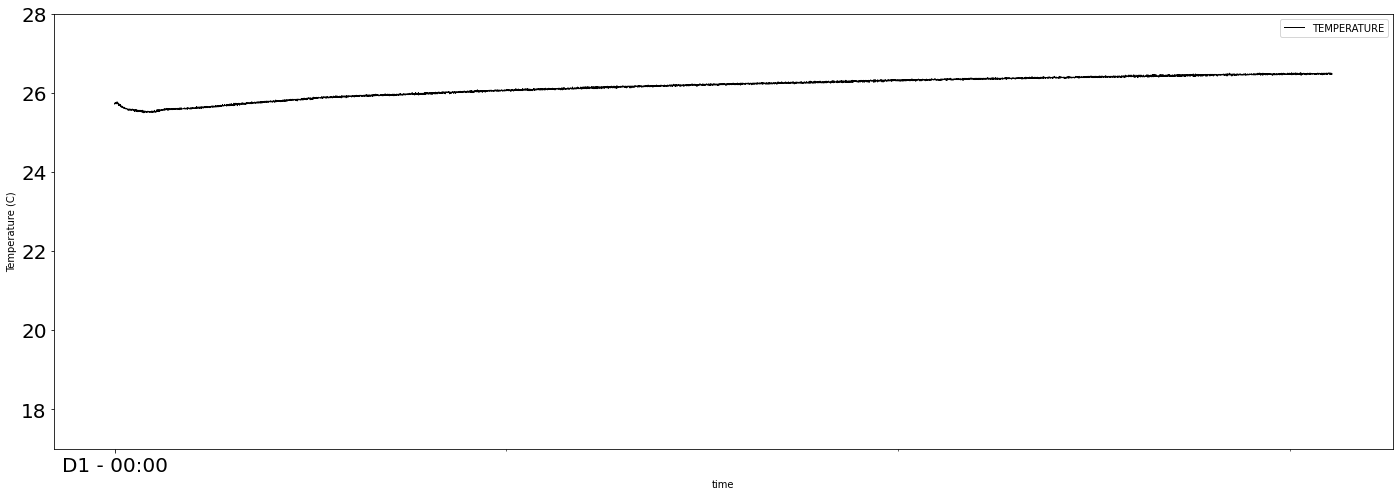

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.06954455375671387 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


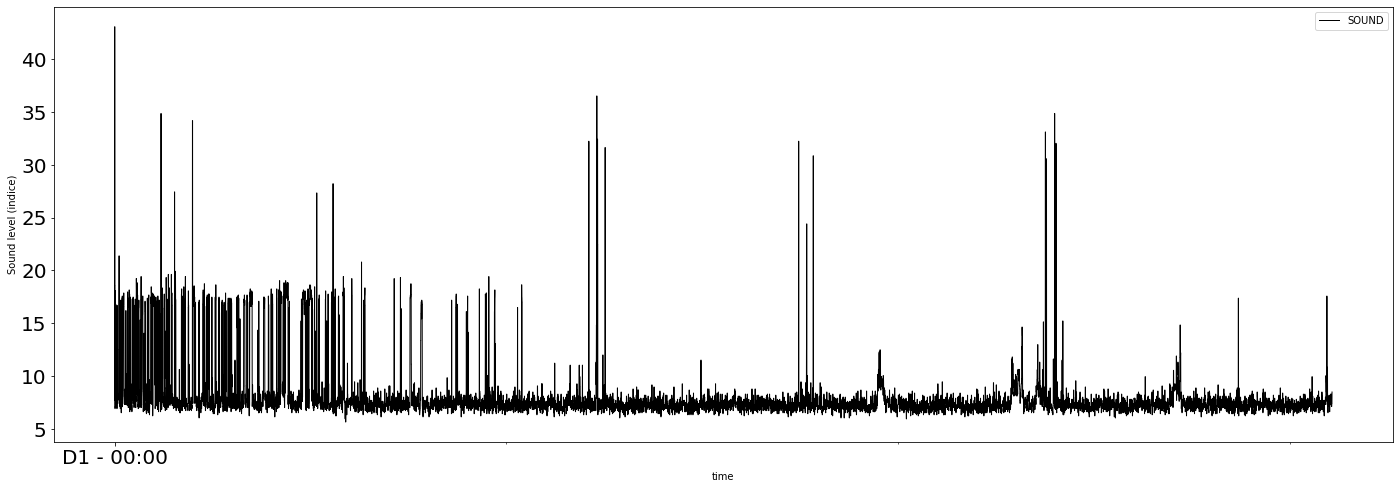

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.06996488571166992 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


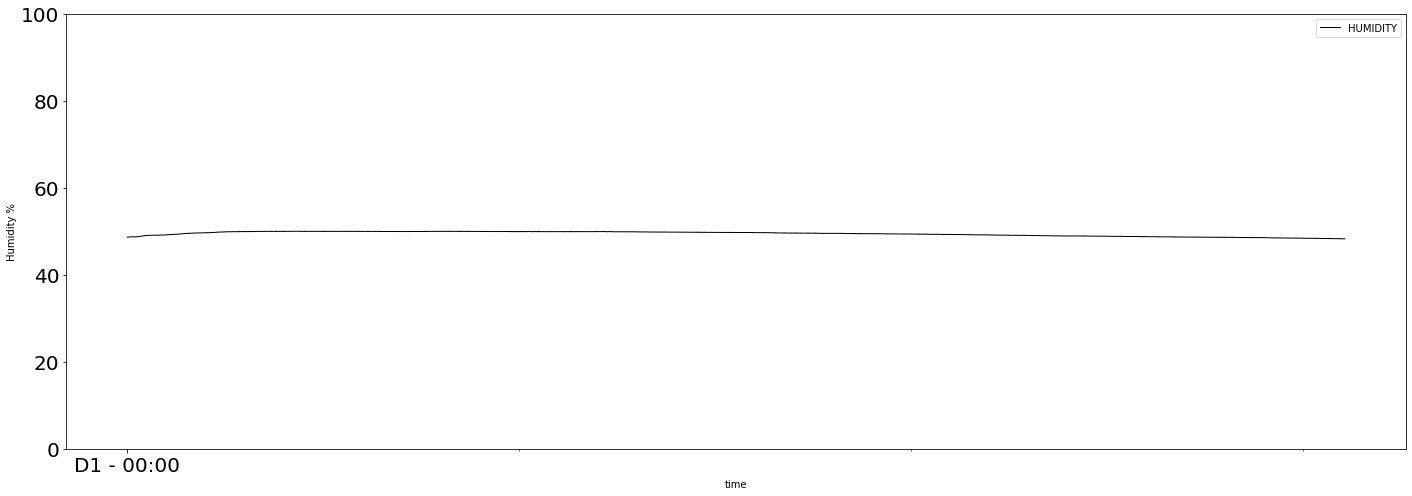

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.06863903999328613 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


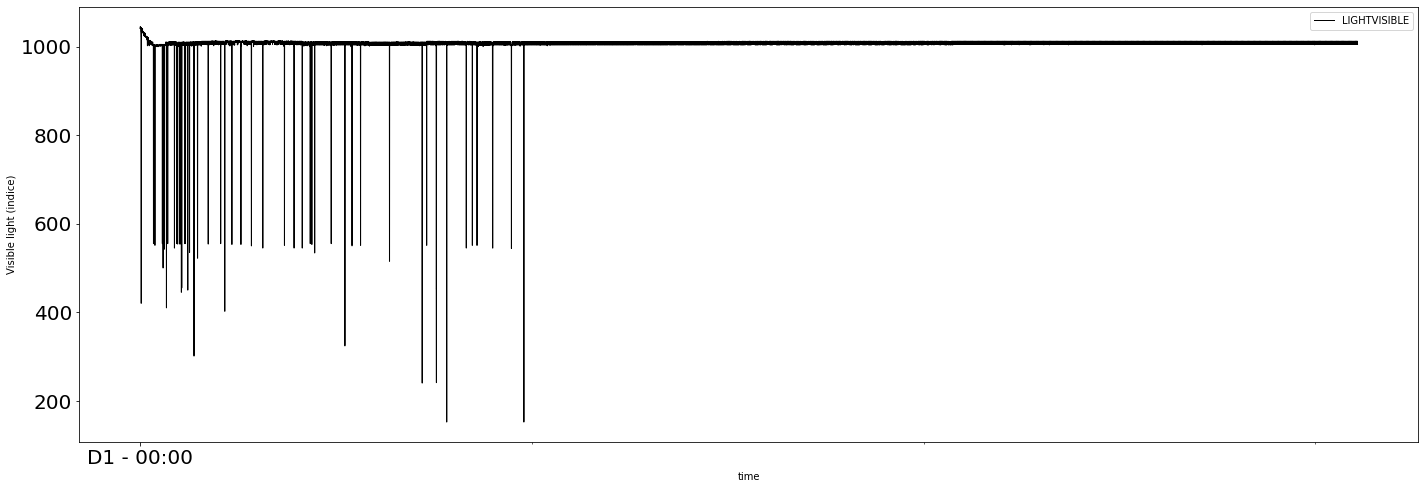

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.0691823959350586 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


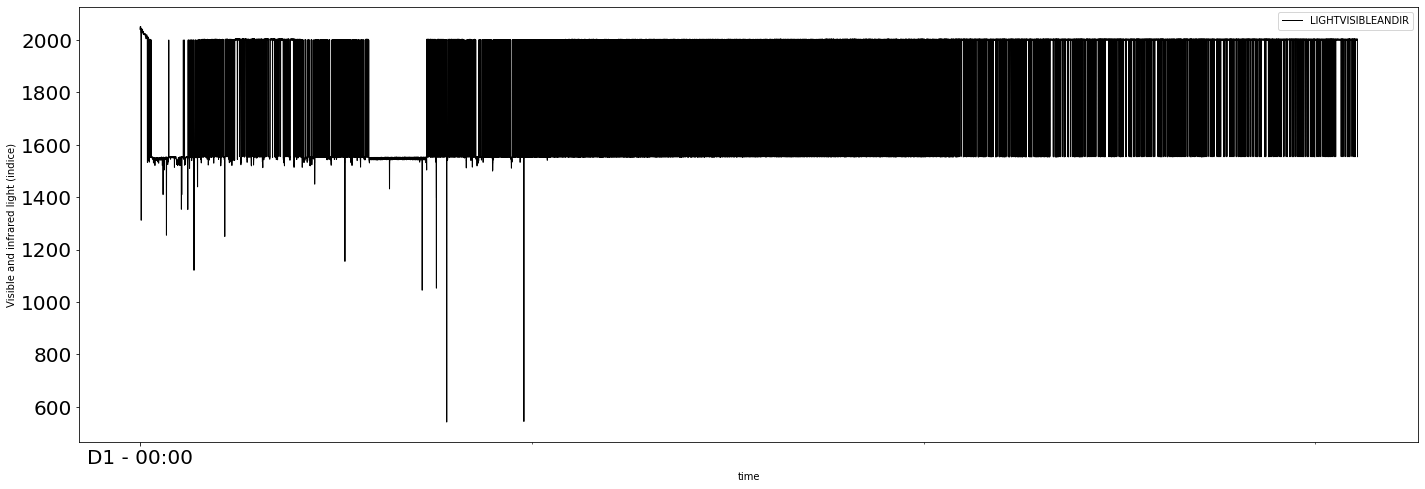

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:03374-03 RFID:000005417141 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:03374-01 RFID:000005417068 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:03374-02 RFID:000005416837 Genotype:L7-TSC1 Het- Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10830307006835938 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_pro

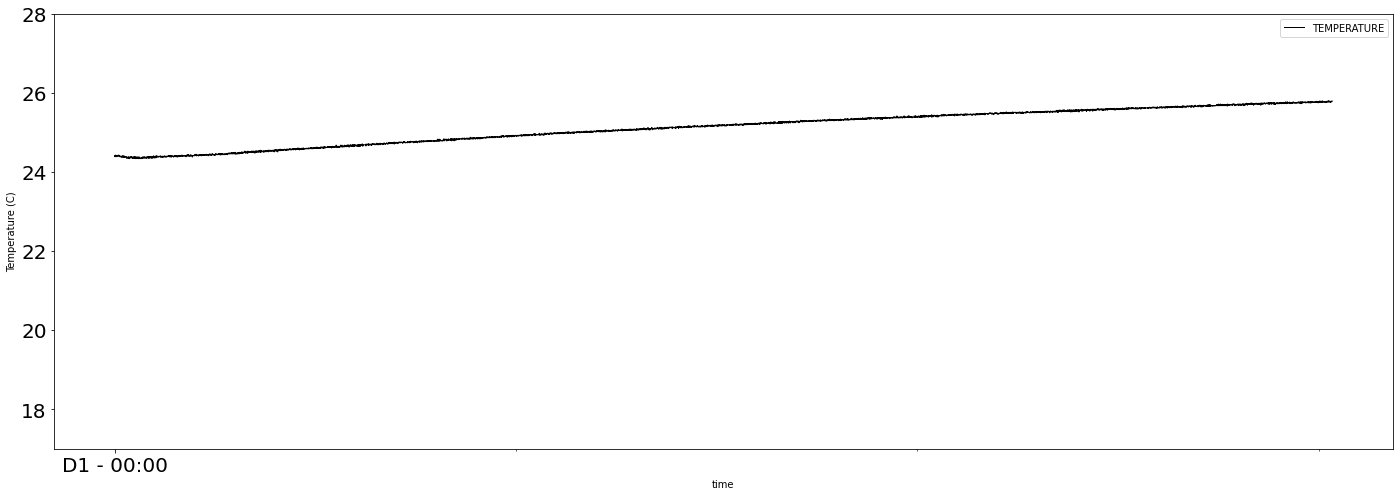

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10780096054077148 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


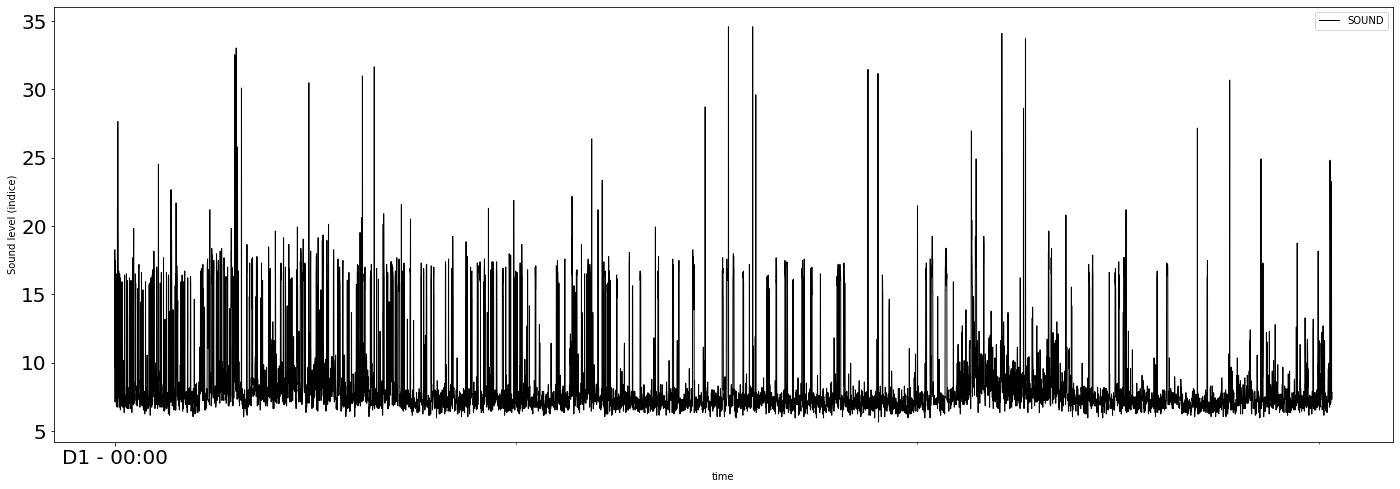

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10760784149169922 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


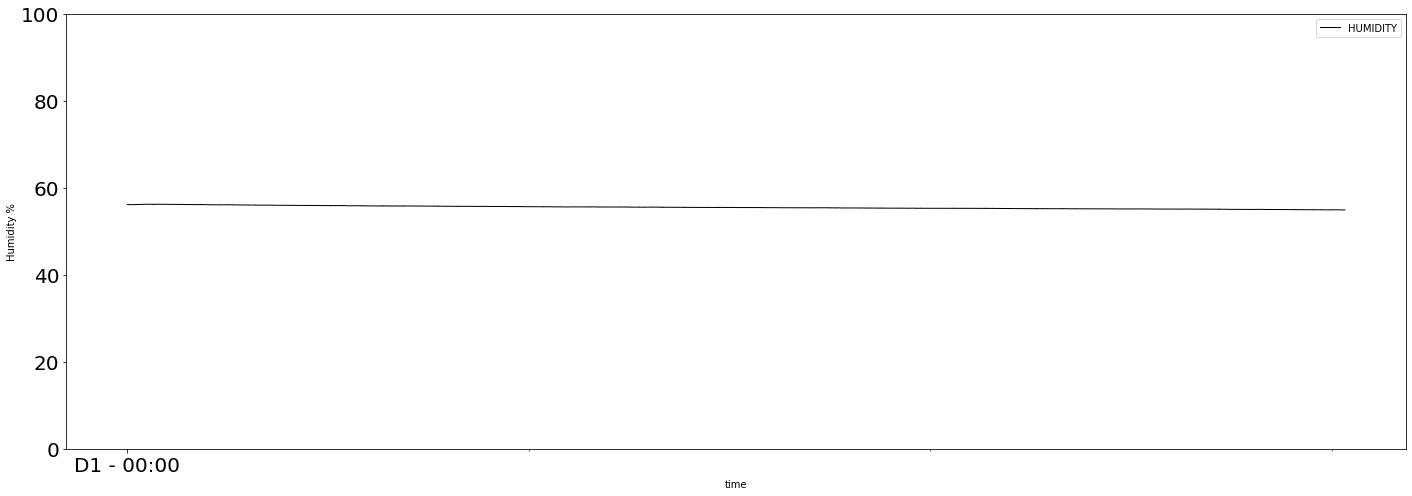

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10748887062072754 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


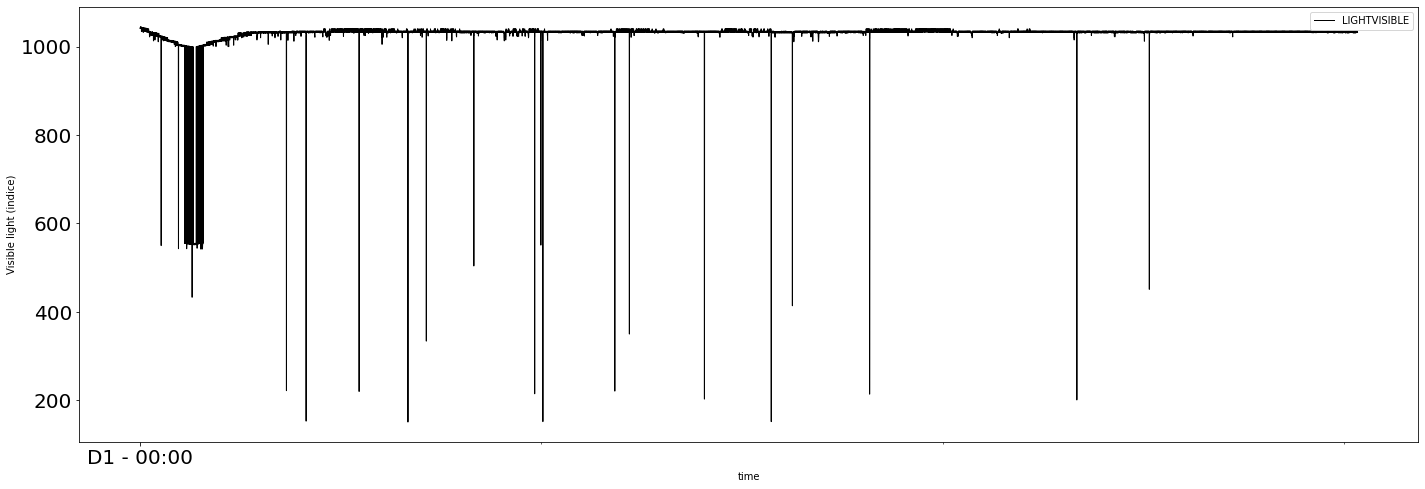

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10732293128967285 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03374-1-2-3_24-07-2023_std1/MI23-03374-1-2-3_24-07-2023_std1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


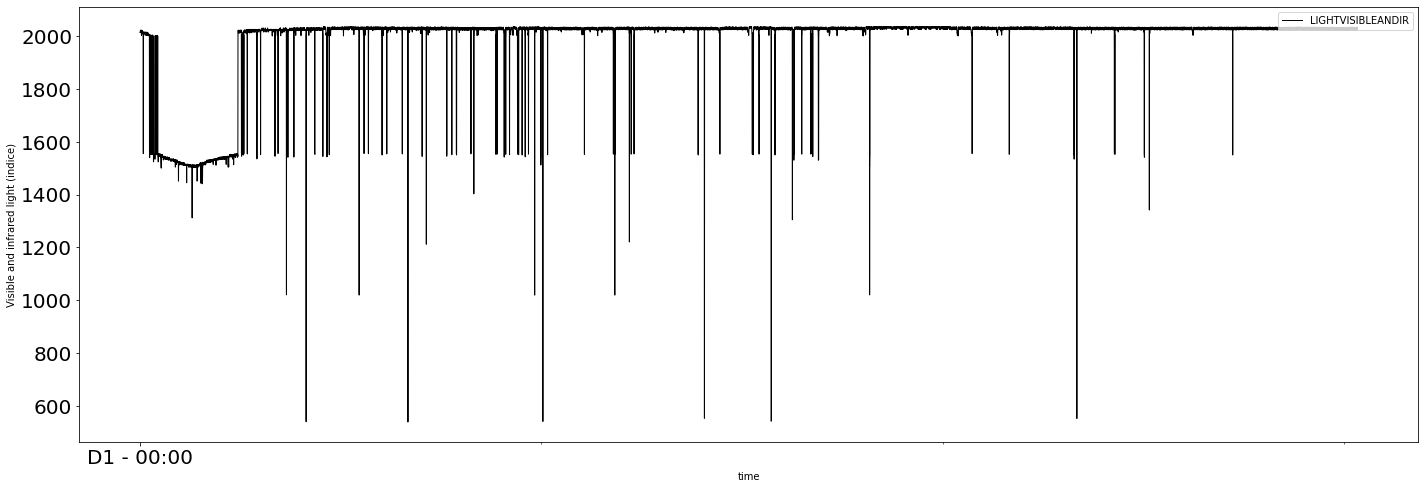

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:filler RFID:000005417153 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:Filler RFID:000005417196 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:dontcare RFID:000005417055 Genotype:L7Shnk2 Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.11277008056640625 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_proc

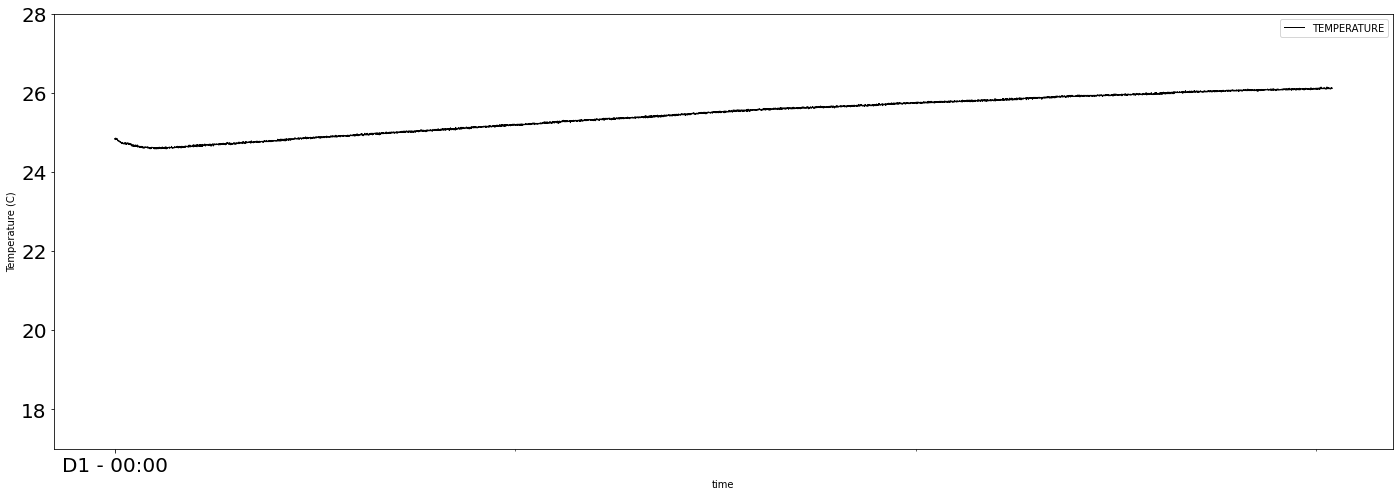

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.11347222328186035 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


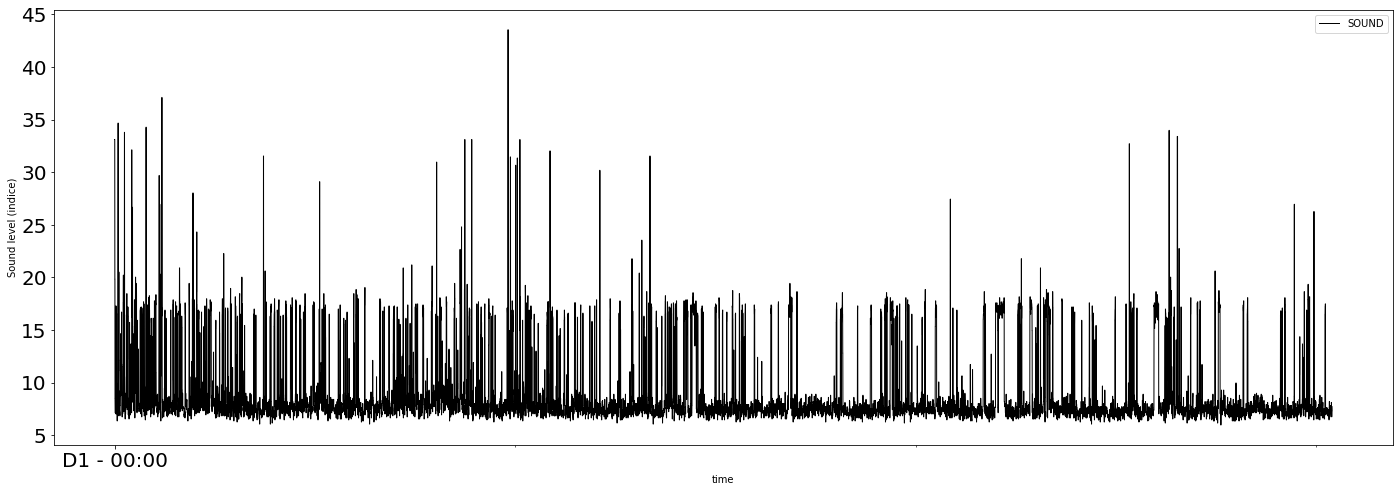

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.11301255226135254 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


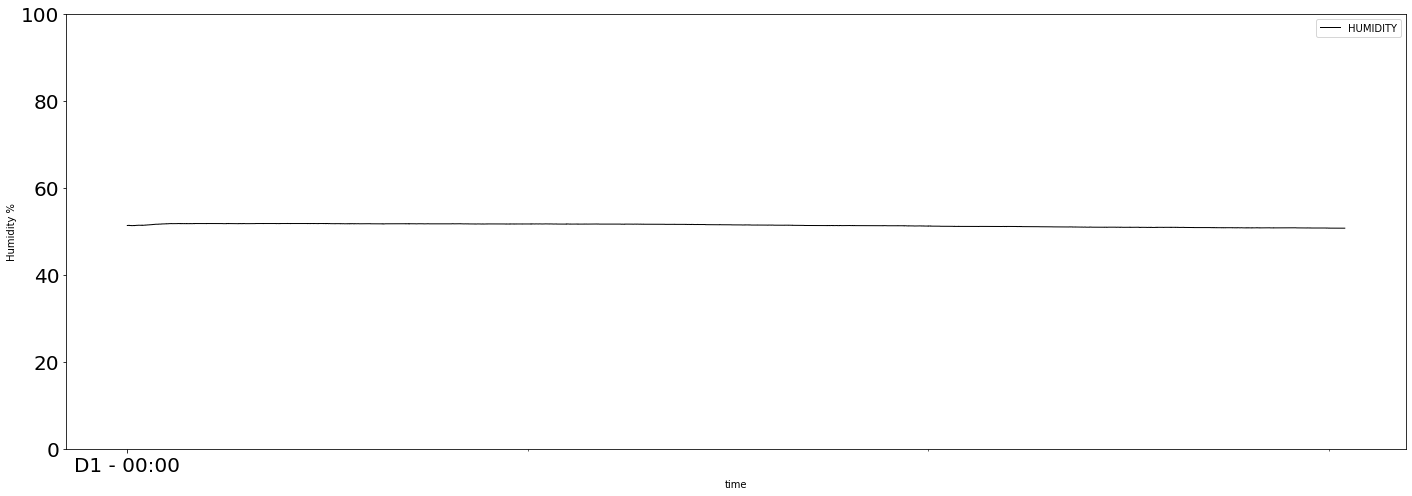

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.1131284236907959 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


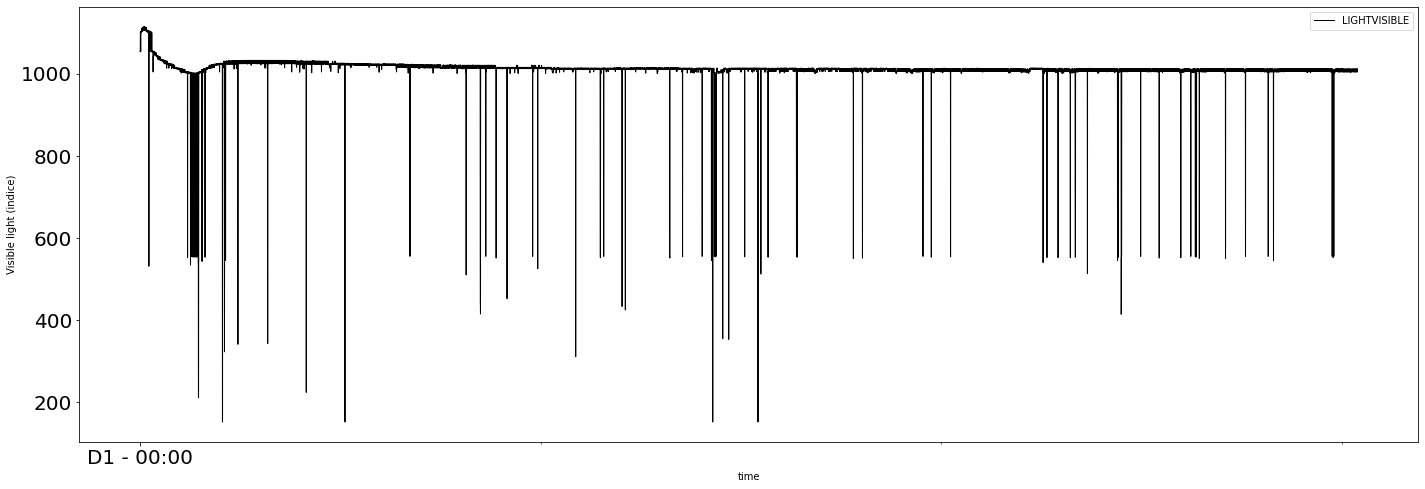

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.11283278465270996 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/03123-01_03121-02-04_17-07-2023_std1/03123-01_03121-02-04_17-07-2023_std1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


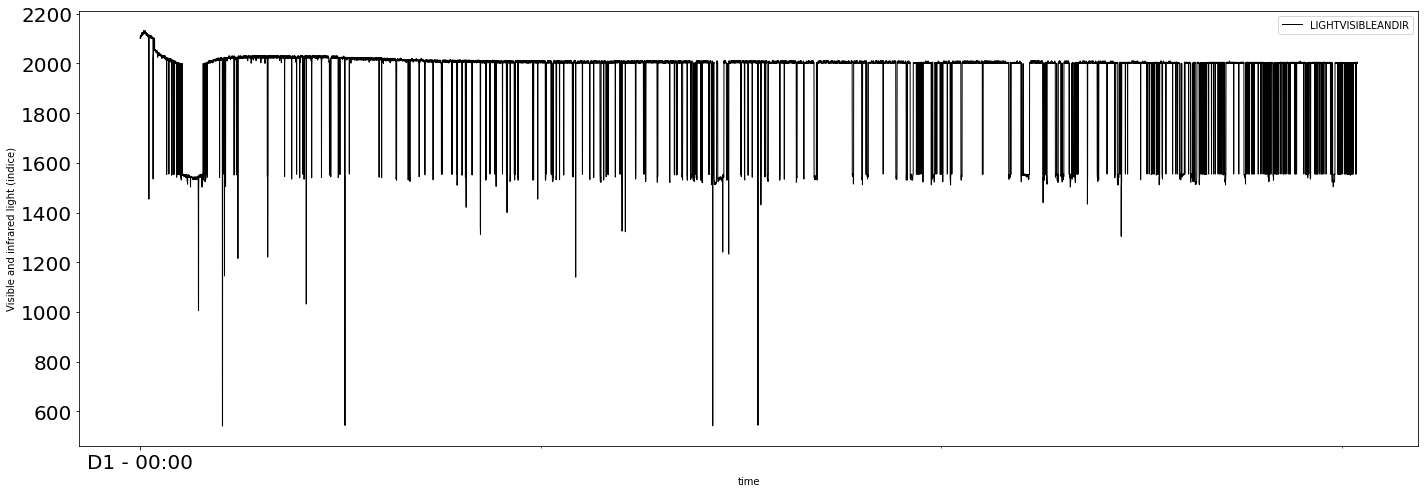

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:01595-01 RFID:000005417072 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:01595-06 RFID:000005416810 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:01595-02 RFID:000005416982 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08648180961608887 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-

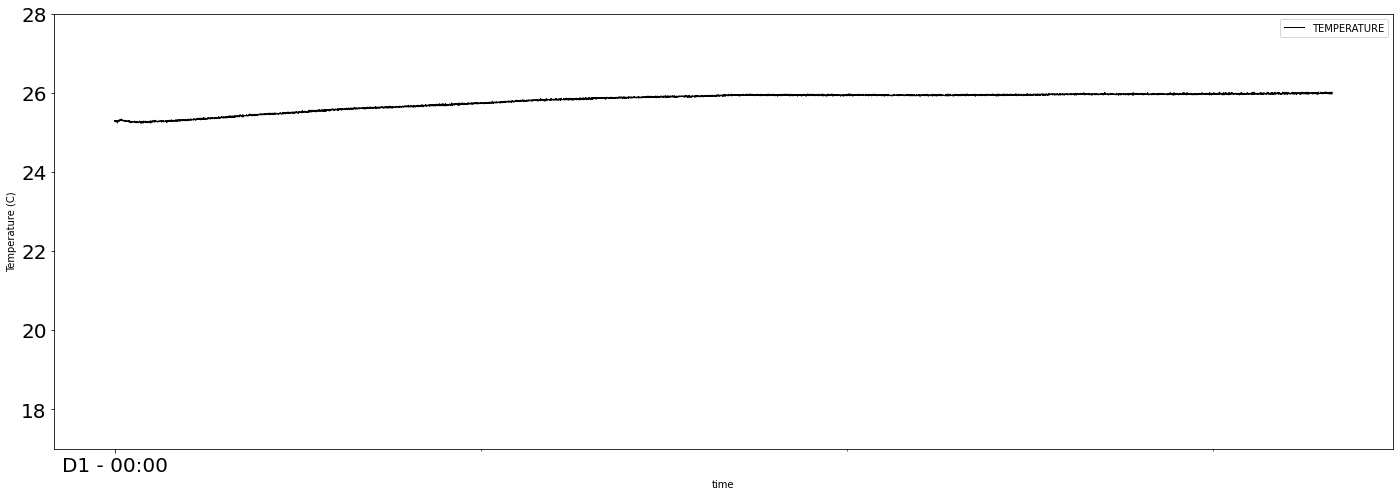

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08631563186645508 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


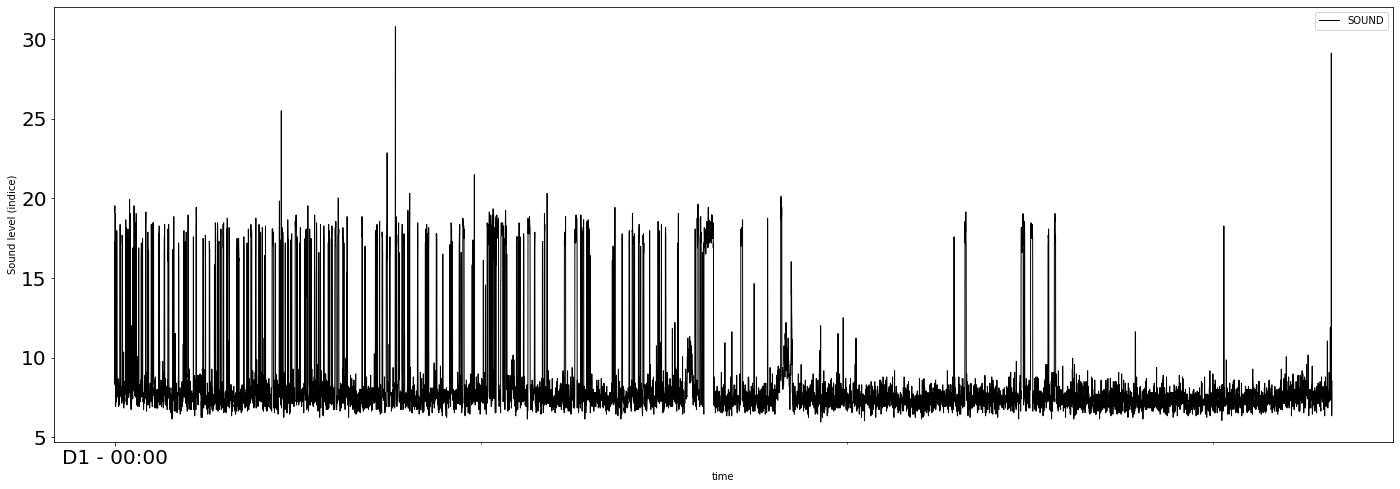

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08611392974853516 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


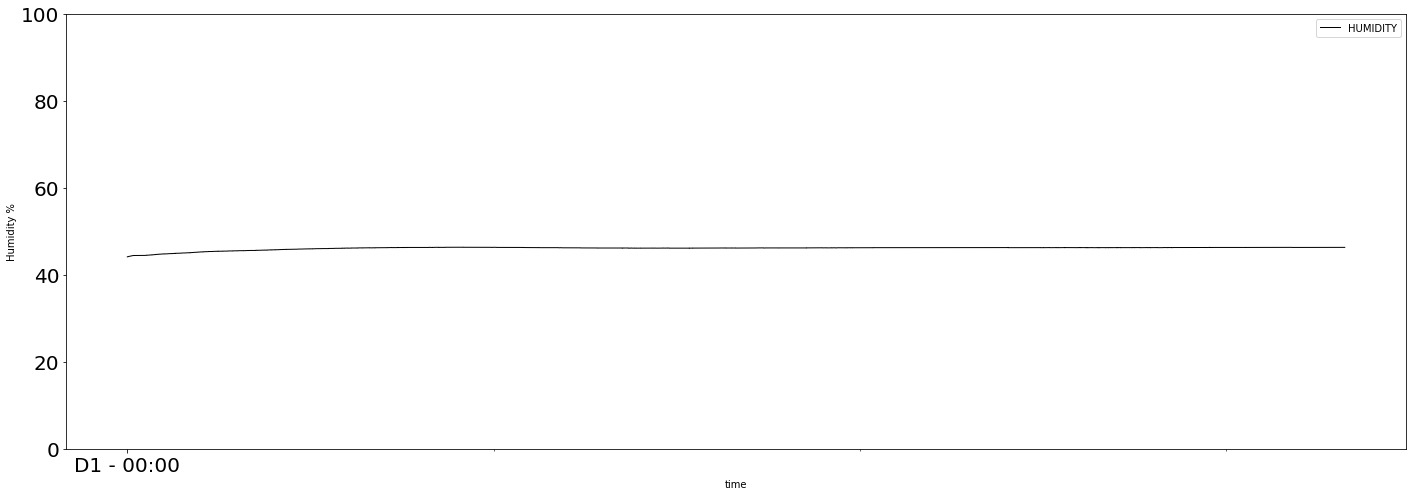

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08633637428283691 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


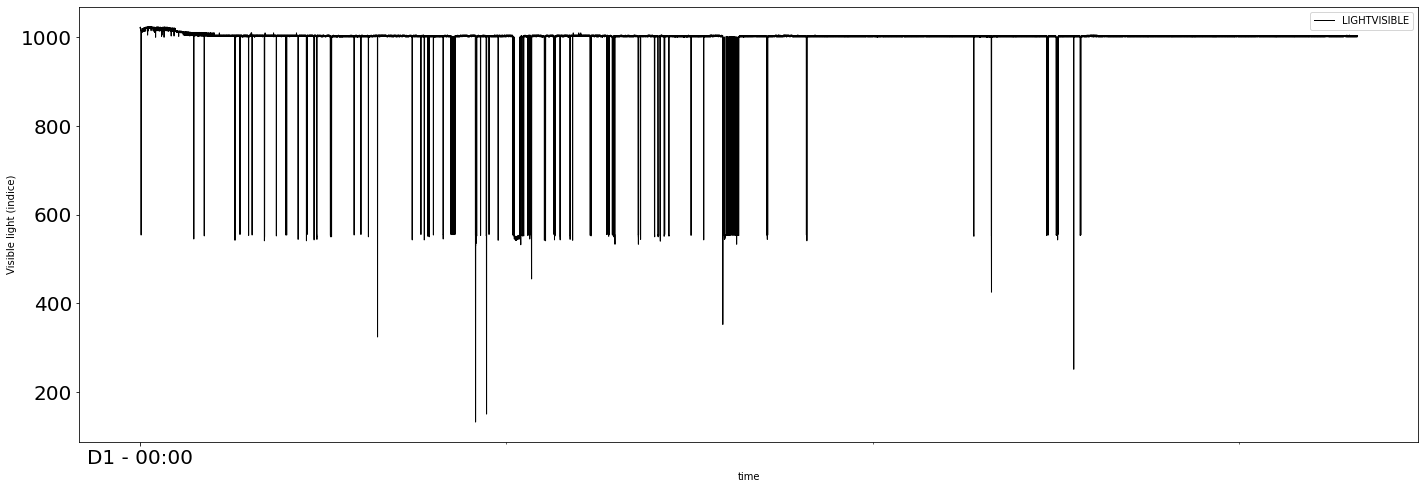

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08635306358337402 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01595-1-2-6_3-7-2023_std1/01595-1-2-6_3-7-2023_std1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


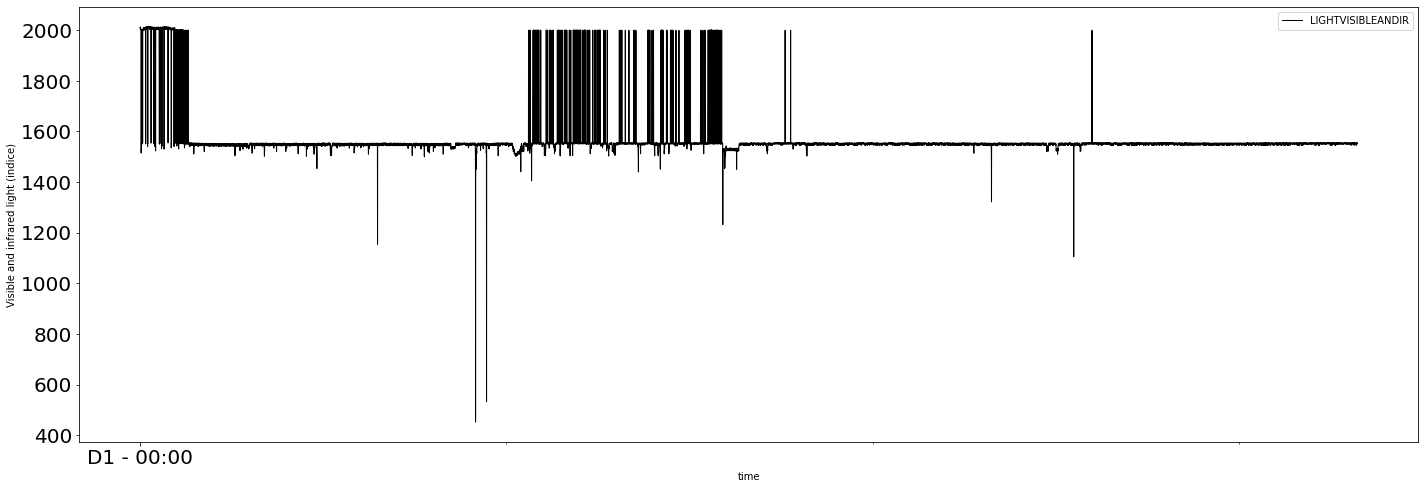

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-02 RFID:000005416936 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02541-03 RFID:000005416897 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08157229423522949 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-

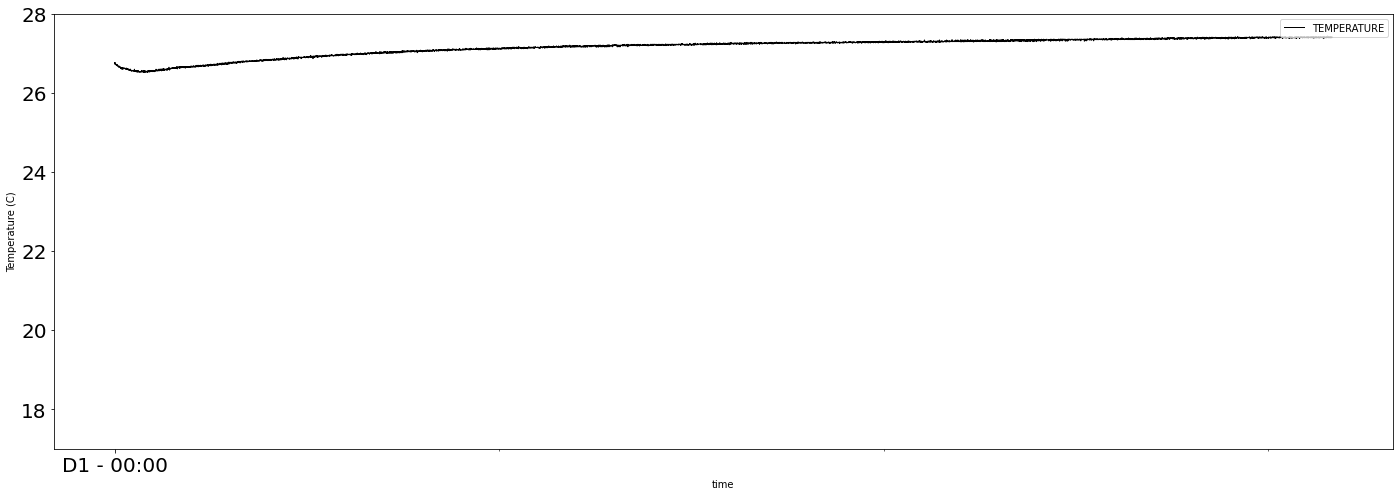

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08297514915466309 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


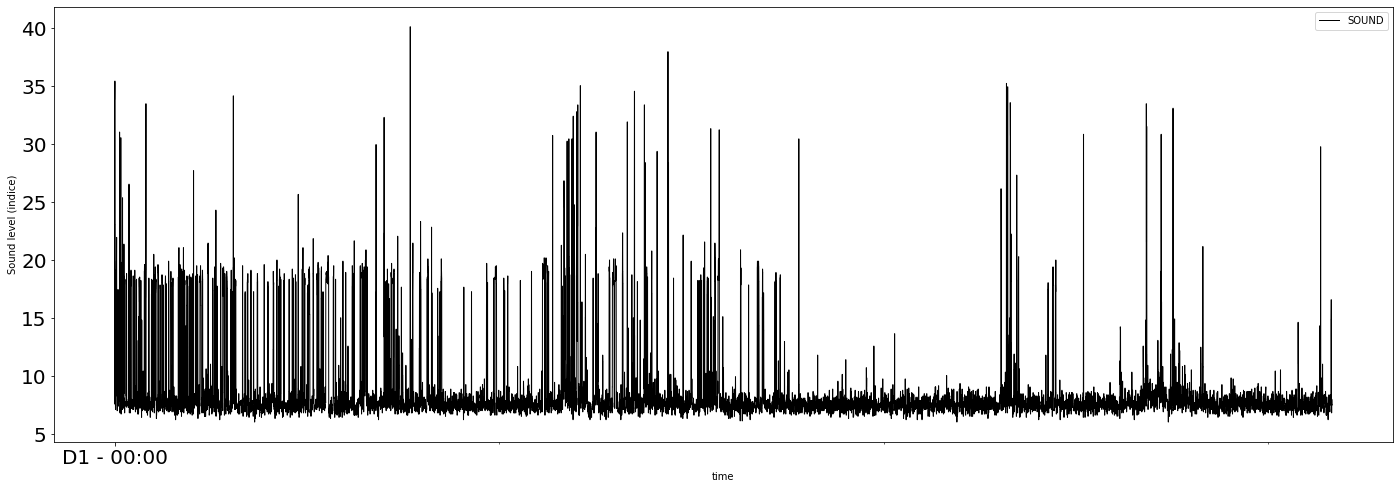

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08285641670227051 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


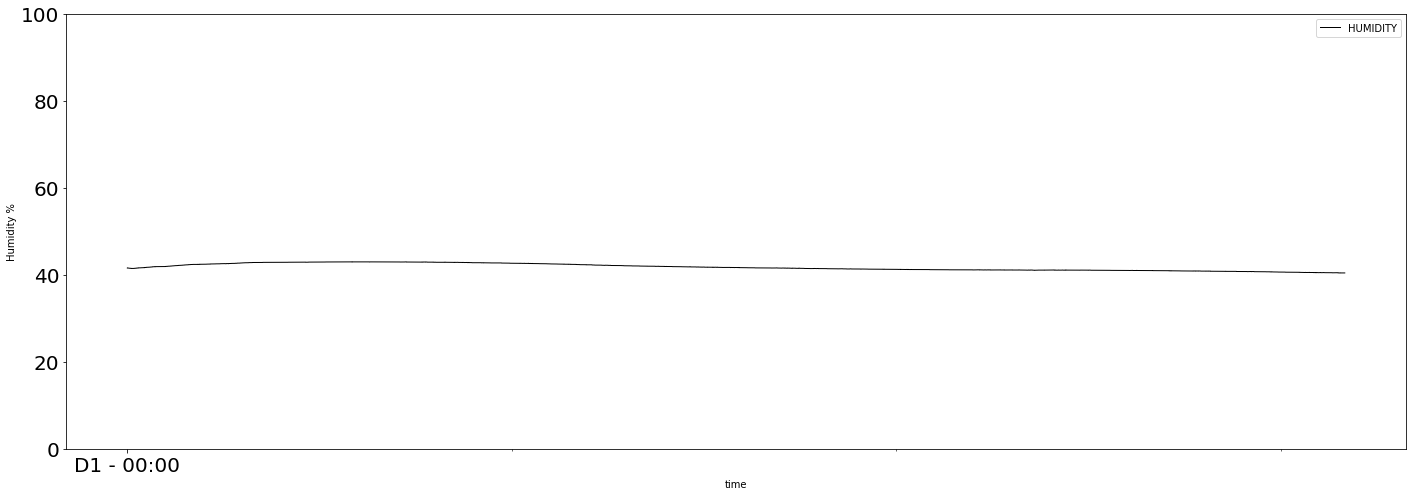

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08204483985900879 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


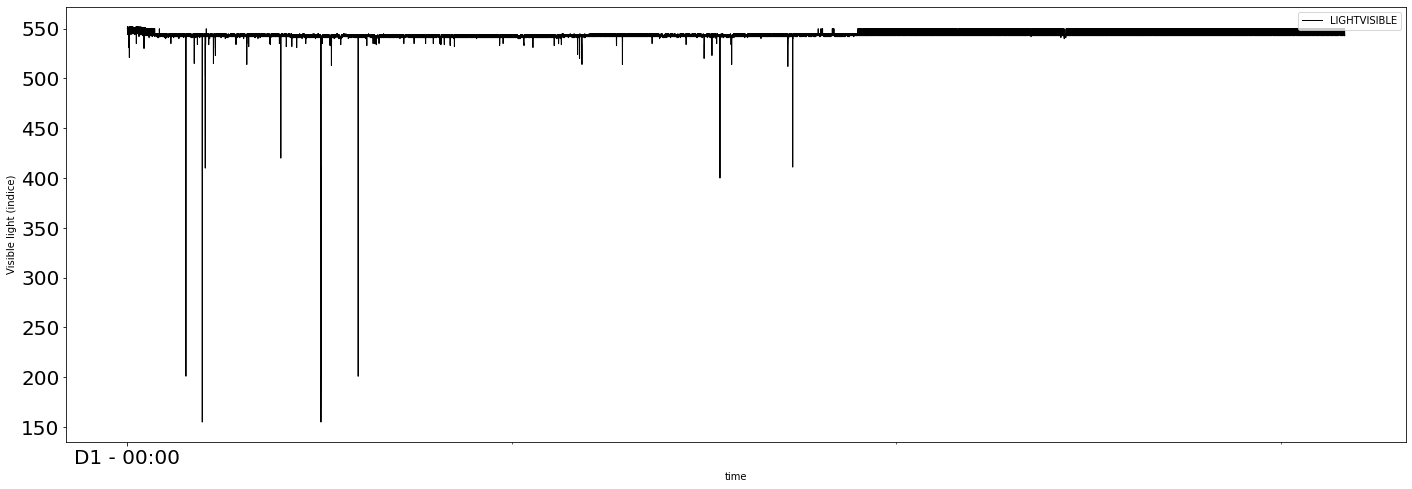

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.08192801475524902 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-05_02541-02-03-STD1/02436-05_02541-02-03-STD1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


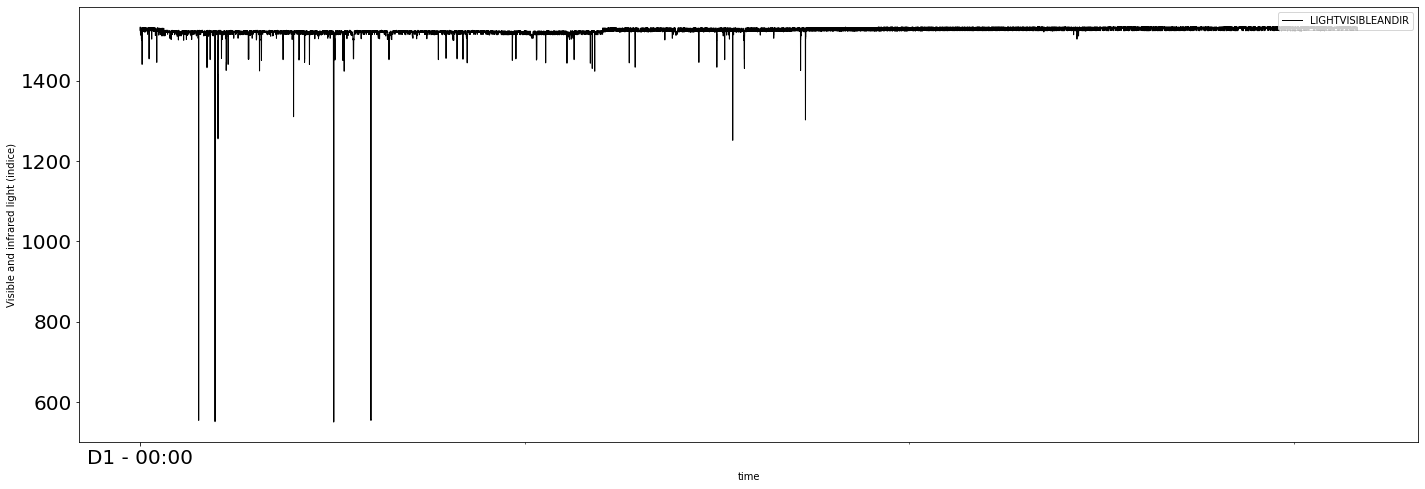

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:02063-04 RFID:000005417090 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:01927-04 RFID:000005416928 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:02063-05 RFID:000005417035 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.1351609230041504 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New

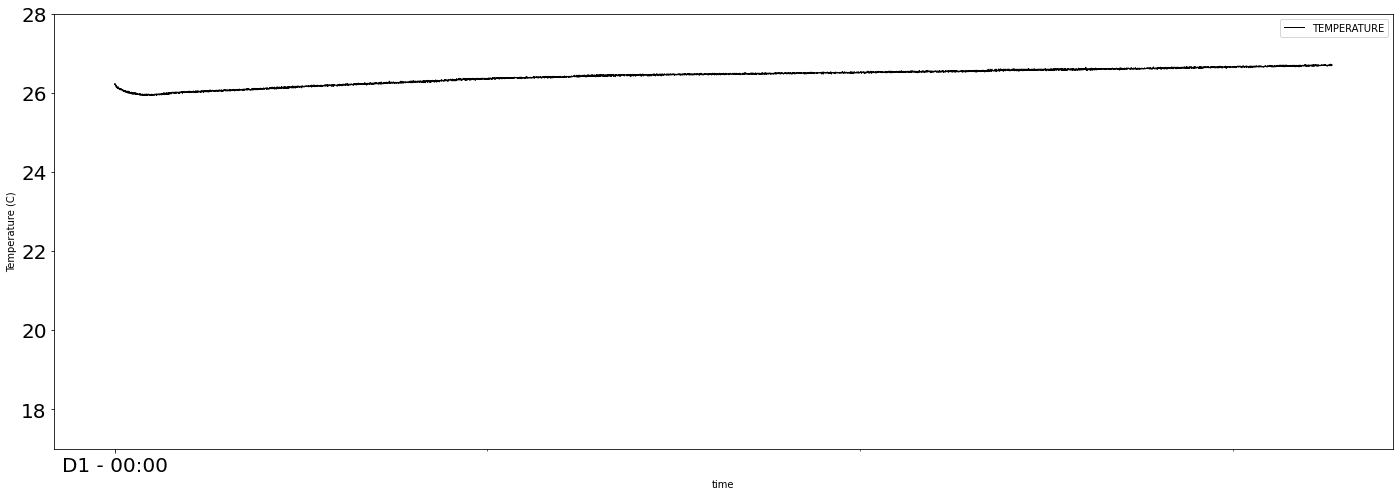

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.13448166847229004 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


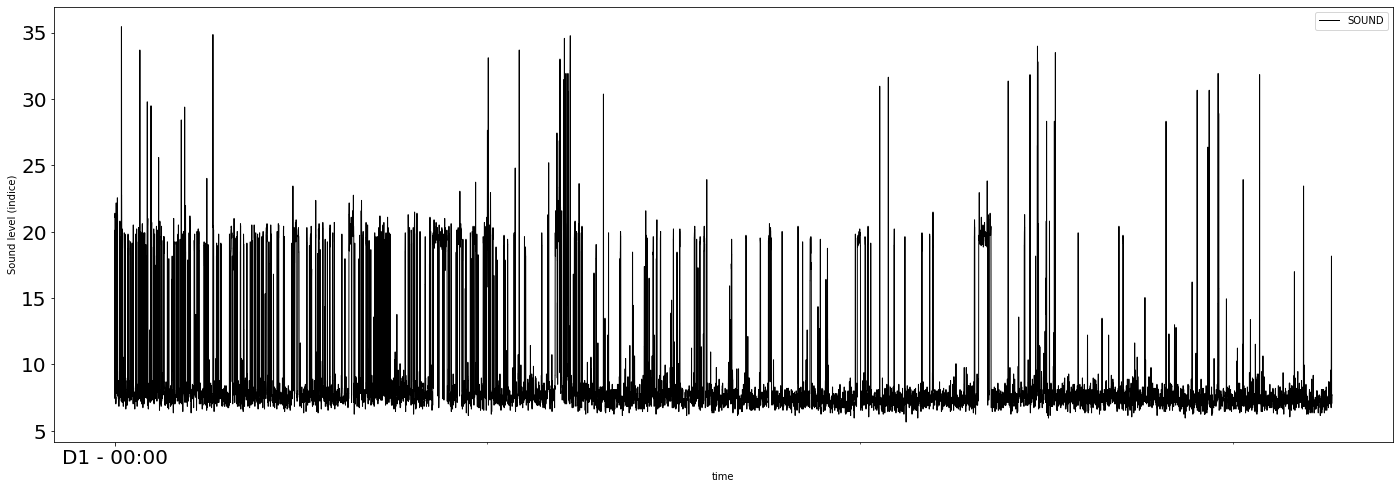

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.13415884971618652 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


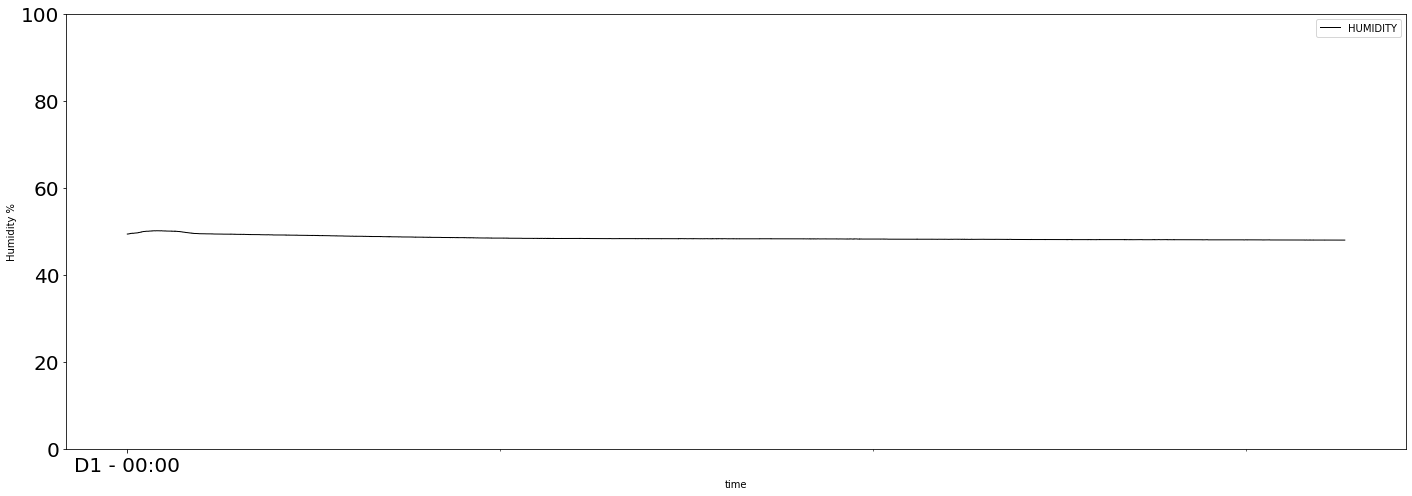

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.13494229316711426 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


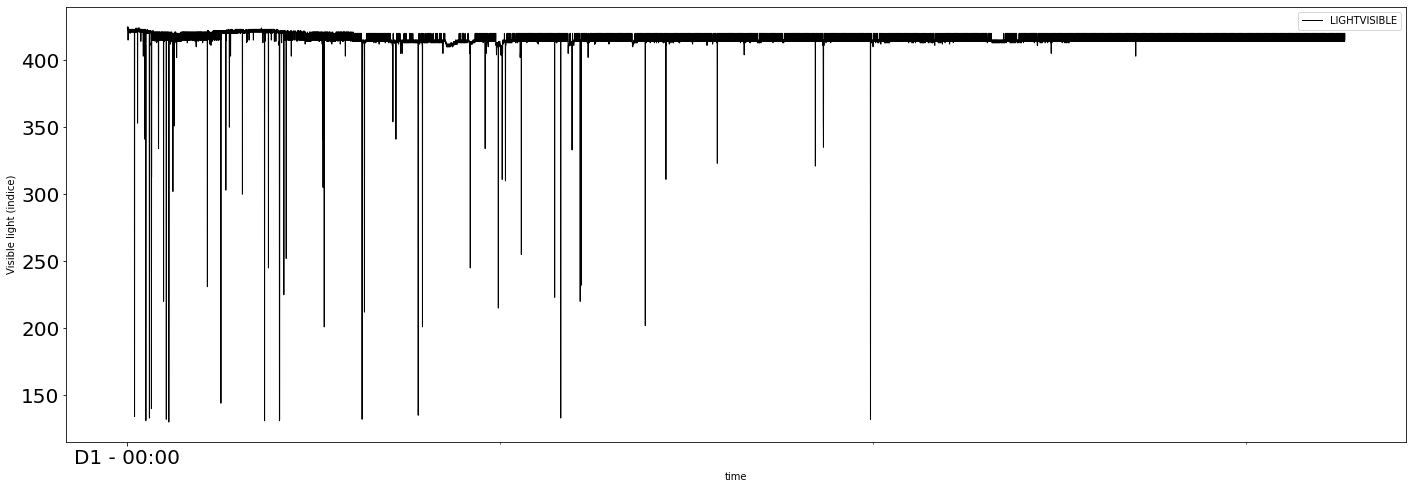

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.13457250595092773 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/01927-04_02063-4-5_std_22-05-23/01927-04_02063-4-5_std_22-05-23.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


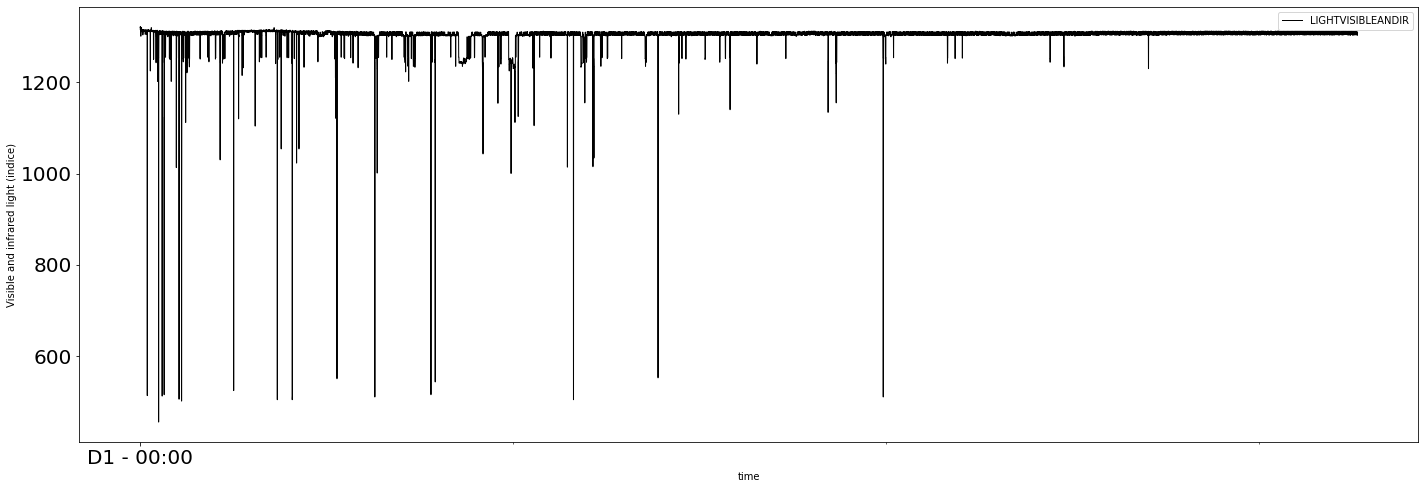

Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite
--------------
Current file:  /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:3 Name:02541-01 RFID:000005416780 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:02436 RFID:000005417240 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:02436 RFID:000005417256 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Build sensor data
plotting sensor data.  TEMPERATURE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.1092994213104248 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436

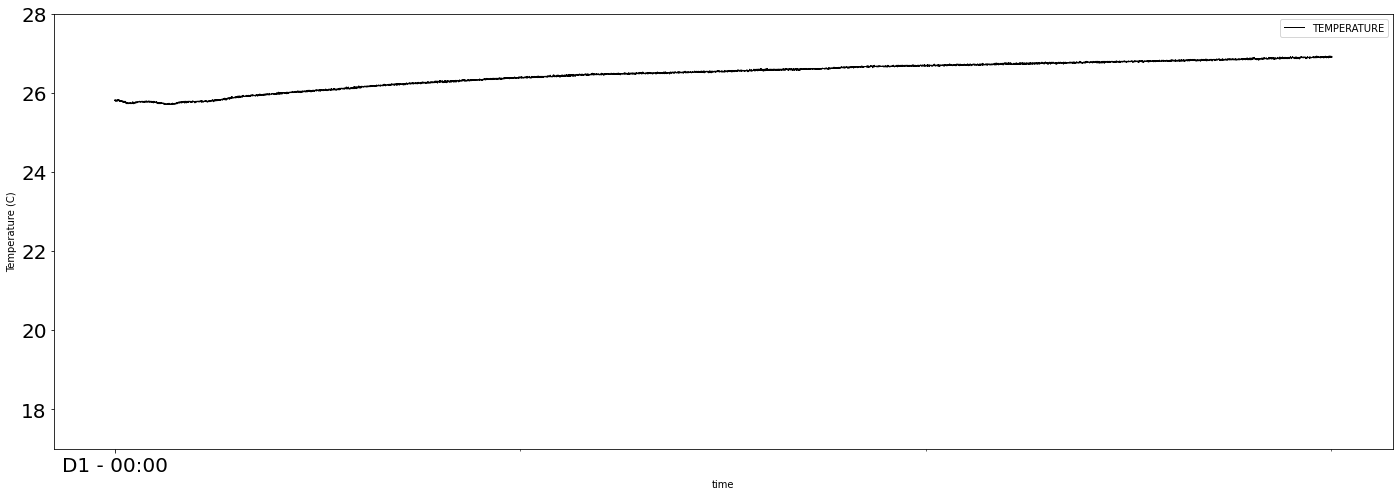

plotting sensor data.  SOUND
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10988426208496094 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite_log_sound level.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


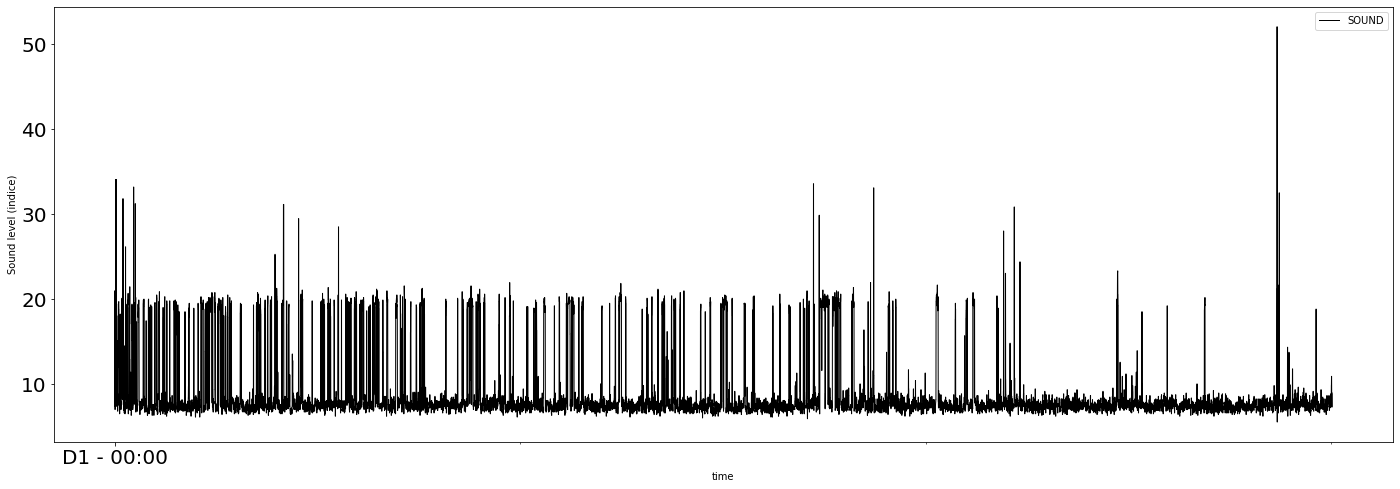

plotting sensor data.  HUMIDITY
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10973739624023438 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite_log_humidity.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


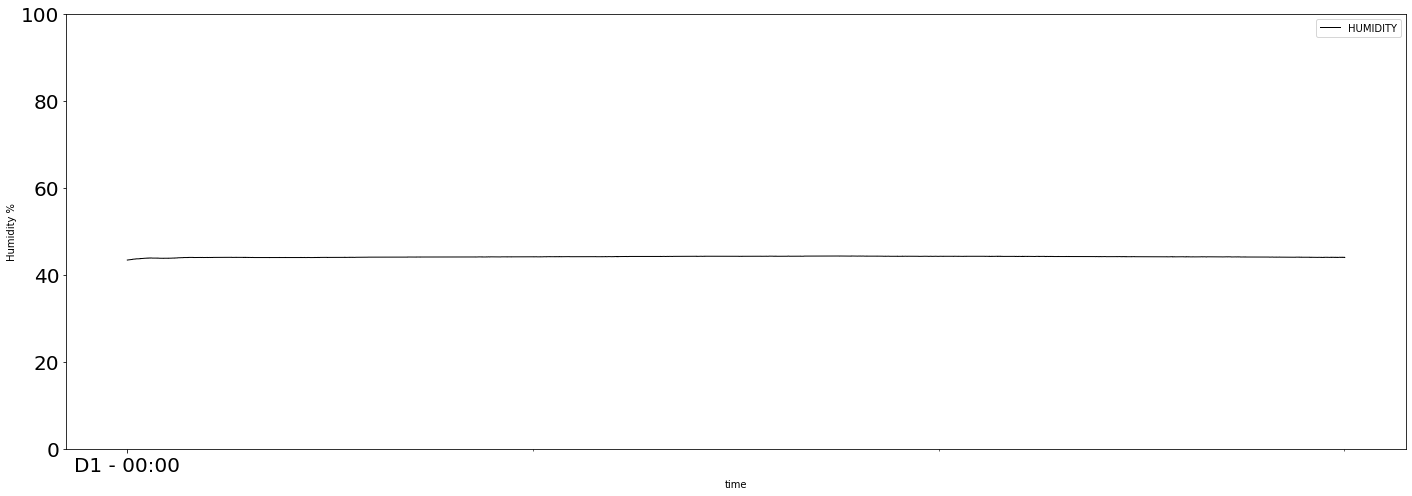

plotting sensor data.  LIGHTVISIBLE
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.10989046096801758 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite_log_light visible.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


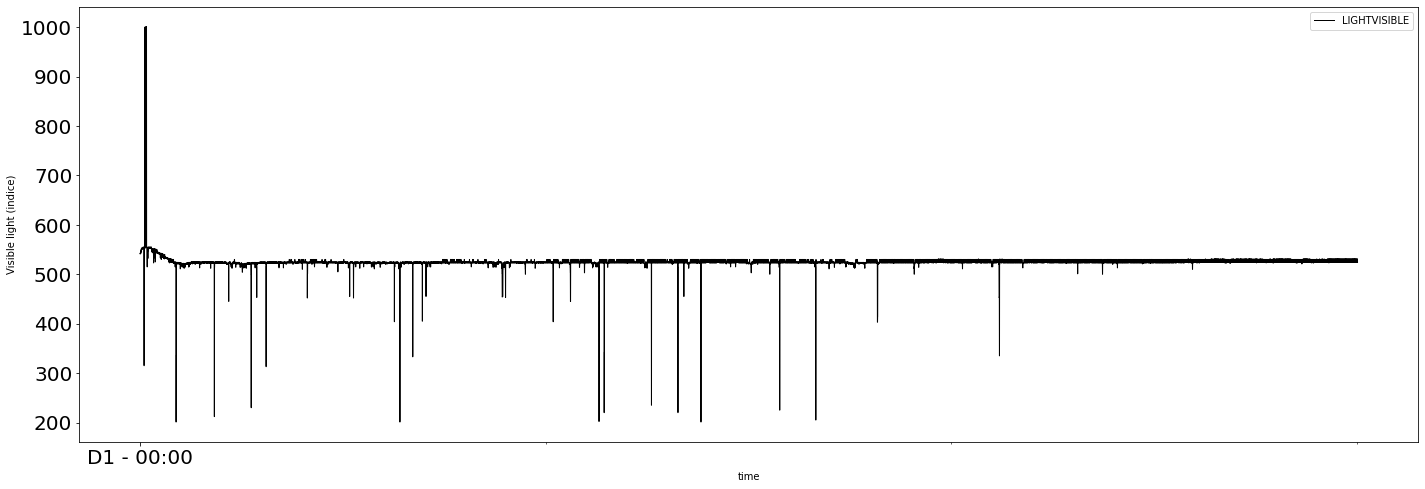

plotting sensor data.  LIGHTVISIBLEANDIR
night  Id( None , None , None , None ) Min/maxFrame: ( None / None ) Loaded ( 0  records loaded in  0.11003398895263672 S )
Saving figure : /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite_log_light visible and infra.pdf
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range
The entered framenumber is out of range


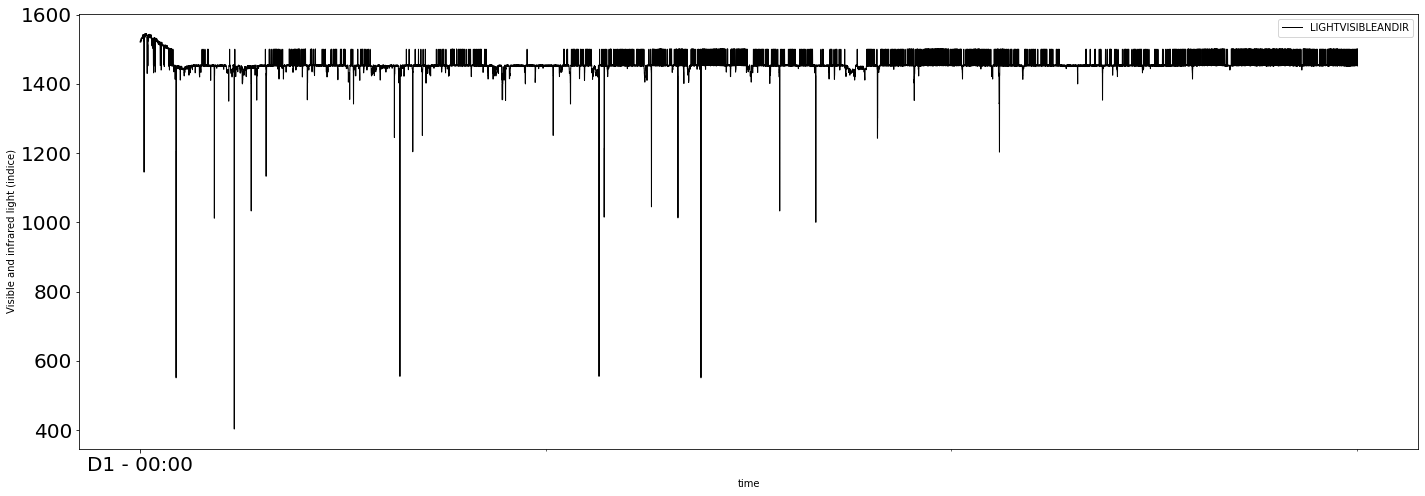

*** ALL JOBS DONE ***


In [9]:
import sys
sys.path.insert(1, "/mnt/Data1/LMT_Analysis/lmt-analysis-master/LMT")

import sqlite3
from lmtanalysis.Animal import *
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from tkinter.filedialog import askopenfilename
import sys
from lmtanalysis.FileUtil import getFilesToProcess

class FileProcessException(Exception):
    pass

def process( file ):
    
    connection = sqlite3.connect( file )     

    print( "--------------")
    print( "Current file: ", file )
    
    connection = sqlite3.connect( file )
    # build sensor data
    animalPool = AnimalPool( )
    animalPool.loadAnimals( connection )
    animalPool.buildSensorData( file, show = True  )
    
print("Code launched.")


if ( files != None ):

    for file in files:
        try:
            print ( "Processing file" , file )
            process( file )
        except FileProcessException:
            print ( "STOP PROCESSING FILE " + file , file=sys.stderr  )

print( "*** ALL JOBS DONE ***")
        

# Step 7: Compute Bad Orientation Estimation 
Caveat: this only looks for events longer than 1 second

**Note: after running this step, you must rename the resulting TXT file with the numbers of the mice used, as it automatically saves this as "bad orientation", and this will be written over the next time this code is run with the next processed database**

In [1]:
##Optional, rechoose files to process for the plot
files = getFilesToProcess()

NameError: name 'getFilesToProcess' is not defined

In [5]:
'''
Created on 13 sept. 2017

@author: Fab
'''

import sqlite3
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis import BuildEventTrain3, BuildEventTrain4, BuildEventTrain2, BuildEventFollowZone, BuildEventRear5, BuildEventFloorSniffing,\
    BuildEventSocialApproach, BuildEventSocialEscape, BuildEventApproachContact,BuildEventOralOralContact,\
    BuildEventApproachRear, BuildEventGroup2, BuildEventGroup3, BuildEventGroup4, BuildEventOralGenitalContact, \
    BuildEventStop, BuildEventWaterPoint, \
    BuildEventMove, BuildEventGroup3MakeBreak, BuildEventGroup4MakeBreak,\
    BuildEventSideBySide, BuildEventSideBySideOpposite, BuildEventDetection,\
    BuildDataBaseIndex, BuildEventWallJump, BuildEventSAP,\
    BuildEventOralSideSequence, CheckWrongAnimal,\
    CorrectDetectionIntegrity
    

from lmtanalysis.TaskLogger import TaskLogger
import sys
import traceback
from lmtanalysis.FileUtil import getFilesToProcess

maxT = 3*oneDay
### Change this based on your thresholding
SPEED_THRESHOLD_HIGH = NaN

class FileProcessException(Exception):
    pass

def getScalarProduct( a, b ):

    return a.x * b.x + a.y * b.y;

def isSameSign( a, b ):
    if ( a >= 0 and b >= 0 ):
         return True;
    if ( a < 0 and b < 0 ):
        return True;
    return False;


def process( file ):

    print(file)
    
    chronoFullFile = Chronometer("File " + file )
    
    connection = sqlite3.connect( file )        
        
                        
    try:

        animalPool = None
        
        print("Caching load of animal detection...")
        animalPool = AnimalPool( )
        animalPool.loadAnimals( connection )
        animalPool.loadDetection( start = 0, end = maxT )
        print("Caching load of animal detection done.")

        text_file = open ( "bad orientation.txt", "a")
  
        nb = {}
        totalLen = {}
  
        for animal in animalPool.getAnimalList():
            
            badOrientationTimeLine = EventTimeLine( None, "bad orientation auto" , animal.baseId , None , None , None , loadEvent=False )
            print ("Processing", animal )
            for t in range( 0, maxT ):
                
                orientation = animal.getOrientationVector( t )
                speedVector = animal.getSpeedVector( t )
                speed = animal.getSpeed( t )

                if ( orientation != None and speedVector != None and speed != None ):
                    if ( speed > SPEED_THRESHOLD_HIGH ):
                        
                        scalar = getScalarProduct( orientation , speedVector )
                        
                        if ( scalar > 0 ):
                            badOrientationTimeLine.addPunctualEvent( t )
           
            # we remove small durations event as we cannot be sure they are not artefact, so we keep only events longer than 1s
            badOrientationTimeLine.removeEventsBelowLength( 30 )
            print ( "Total len in frame: " , badOrientationTimeLine.getTotalLength( ) )
            totalLen[animal] = badOrientationTimeLine.getTotalLength( )
            nb[animal] = badOrientationTimeLine.getNbEvent()
            
            badOrientationTimeLine.endRebuildEventTimeLine(connection)

        text_file.write( "{}\t".format( file ) )
        for resKey in totalLen.keys():
            text_file.write( "animal\t{}\tnb\t{}\ttotalLen\t{}\t".format( animal.RFID , nb[resKey], totalLen[resKey] ) )     
        text_file.write( "\n" ) 
        text_file.close()

        chronoFullFile.printTimeInS()
        
    except:
        
        exc_type, exc_value, exc_traceback = sys.exc_info()
        lines = traceback.format_exception(exc_type, exc_value, exc_traceback)
        error = ''.join('!! ' + line for line in lines)
        
        t = TaskLogger( connection )
        t.addLog( error )
        
        print( error, file=sys.stderr ) 
        
        raise FileProcessException()
        

if __name__ == '__main__':
    
    print("Code launched.")
    

    chronoFullBatch = Chronometer("Full batch" )    
        
    if ( files != None ):
    
        for file in files:
            try:
                print ( "Processing file" , file )
                process( file )
            except FileProcessException:
                print ( "STOP PROCESSING FILE " + file , file=sys.stderr  )
    
    
    '''    
    for file in files:

        
        try:
            process( file )
        except FileProcessException:
            print ( "STOP PROCESSING FILE " + file , file=sys.stderr  )
        
    '''     
    chronoFullBatch.printTimeInS()
    print( "*** ALL JOBS DONE ***")
        
        

Code launched.
Processing file /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
/mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/MI23-03123-02-03-04_17-07-2023_std1/MI23-03123-01-02-03_17-07-2023_std1.sqlite
Caching load of animal detection...
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:03123-01 RFID:000005416968 Genotype:Filler Strain:None Age:None Sex:None Setup:None
Animal Id:1 Name:03123-02 RFID:000005416963 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:3 Name:03123-03 RFID:000005416775 Genotype:L7-TSC1 Het+ Strain:None Age:None Sex:None Setup:None
Animal Id:2 Name:03123-01 RFID:000005416968 Genotype:Filler Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, B

Animal Id:2 Name:filler RFID:000005417153 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None   320916  detections loaded in 1.636730432510376 seconds.
Animal Id:3 Name:Filler RFID:000005417196 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=3 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
Animal Id:3 Name:Filler RFID:000005417196 Genotype:L7Shank2 Strain:None Age:None Sex:None Setup:None   320916  detections loaded in 1.9632318019866943 seconds.
Animal Id:1 Name:dontcare RFID:000005417055 Genotype:L7Shnk2 Strain:None Age:None Sex:None Setup:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
Animal Id:1 Name:dontcare RFID:000005417055 

Animal Id:1 Name:02436-05 RFID:000005416818 Genotype:Tsc1 Wt Strain:None Age:None Sex:None Setup:None   196454  detections loaded in 0.9297688007354736 seconds.
Caching load of animal detection done.
Event bad orientation auto created. eventNameWithId = bad orientation auto idA:3 idB:None idC:None idD:None loadEvent: False
Processing Animal Id:3 Name:02541-02 RFID:000005416936 Genotype:L7-Tsc1 Mut Strain:None Age:None Sex:None Setup:None
Total len in frame:  0
no event
Keep previous entry.
Saving timeLine: bad orientation auto ( 0 events )
Event bad orientation auto created. eventNameWithId = bad orientation auto idA:2 idB:None idC:None idD:None loadEvent: False
Processing Animal Id:2 Name:02541-03 RFID:000005416897 Genotype:L7-Tsc1 Wt Strain:None Age:None Sex:None Setup:None
Total len in frame:  0
no event
Keep previous entry.
Saving timeLine: bad orientation auto ( 0 events )
Event bad orientation auto created. eventNameWithId = bad orientation auto idA:1 idB:None idC:None idD:None l

Total len in frame:  0
no event
Keep previous entry.
Saving timeLine: bad orientation auto ( 0 events )
[Chrono  File /mnt/Data1/Arun/LMT/LMT_data/Not_processed/New L7s/02436-04-02_02541-01_std1/02436-04-02_02541-01_std1.sqlite  ]  17.954917669296265  seconds
[Chrono  Full batch  ]  120.91299819946289  seconds
*** ALL JOBS DONE ***


# Done!
